# About Dataset

The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.

# Column Descriptors

1. StockCode: A code used to identify the product that was purchased

2. Description: A brief description of the product that was purchased

3. Quantity: The quantity of the product that was purchased

4. InvoiceDate: The date and time that the purchase was made

5. UnitPrice: The price of one unit of the product that was purchased

6. CustomerID: The unique identifier for the customer who made the purchase

7. Country: The country where the customer who made the purchase is located

# Importing Important libraries

In [1]:
# import the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )
import plotly.express as px
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18


# Reading Data Csv File

In [2]:
# reading data from github
df = pd.read_csv("https://raw.githubusercontent.com/sumeet0701/Online-Retail-Transation/main/Online%20Retail.csv")

In [3]:
# displaying top 5
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
# last 5 rows of dataframe
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [5]:
# shape of dataframe
print(f"Total No of Rows are ={df.shape[0]} and Columns = {df.shape[1]}")

Total No of Rows are =541909 and Columns = 8


* Total 541909 rows and 8 columns are there in dataframe

In [6]:
# basic info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [7]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    
output.sort_values("missing",ascending=False).reset_index(drop=True)
output

,variable,dtype,count,unique,missing
0,InvoiceNo,object,541909,25900,0
1,StockCode,object,541909,4070,0
2,Description,object,541909,4224,1454
3,Quantity,int64,541909,722,0
4,InvoiceDate,object,541909,23260,0
5,UnitPrice,float64,541909,1630,0
6,CustomerID,int64,541909,4372,0
7,Country,object,541909,38,0


# handling duplicated values

In [8]:
# checking duplicated values
print(f"Total duplicated values = {df.duplicated().sum()}")
print(f"Total duplicated values in %age = {df.duplicated().mean()*100}%")

Total duplicated values = 5268
Total duplicated values in %age = 0.9721189350979592%


* Total 5268 duplicated values which around 0.97% appox 1%
* we can drop duplicated values

In [9]:
# droping duplicated values
df.drop_duplicates(inplace = True)

In [10]:
cat_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(include=['int','float']).columns

# Handling Missing values:


In [11]:
# checking for null values
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [12]:
# checking for null values in percentage
df.isnull().mean() * 100

InvoiceNo      0.000000
StockCode      0.000000
Description    0.270945
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
dtype: float64

<Axes: >

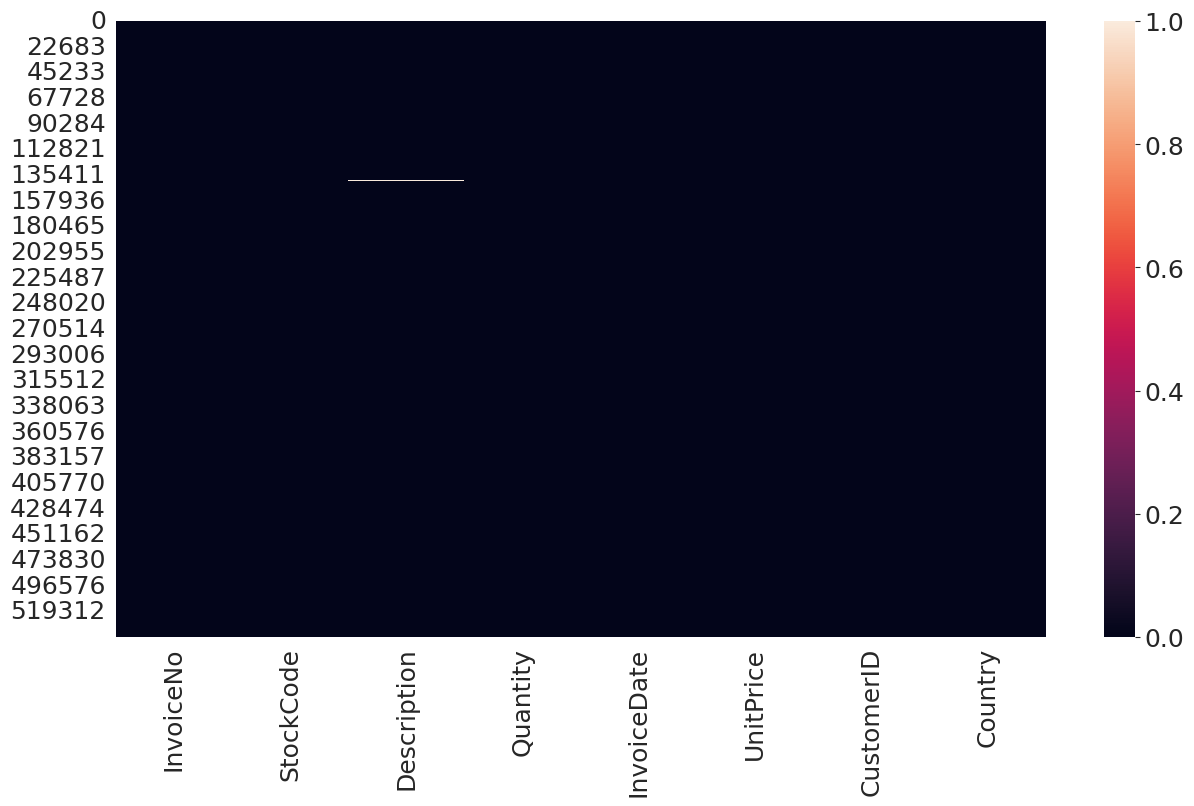

In [13]:
# ploting heatmap for null values
sns.heatmap(df.isnull())

* Only Description Columns have null values which is around 0.27%
* so we can drop null values

In [14]:
# created a function which will display columns names of having null values
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.figure(figsize=(10,6))
        plt.show()
        
    else:
        print('No NAs found')

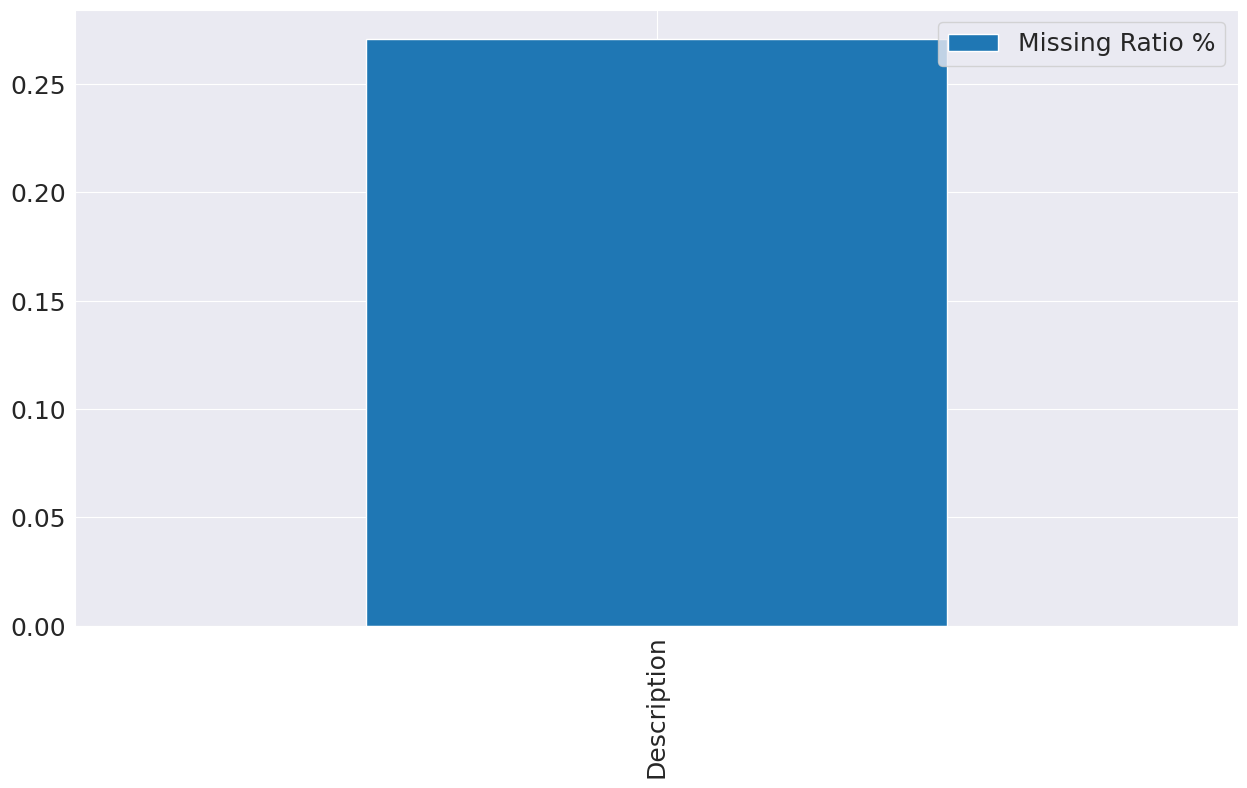

<Figure size 1000x600 with 0 Axes>

In [15]:
plot_nas(df)

In [16]:
# droping null values
df.dropna(inplace = True)

In [17]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

,variable,dtype,count,unique,missing
0,InvoiceNo,object,535187,24446,0
1,StockCode,object,535187,3958,0
2,Description,object,535187,4223,0
3,Quantity,int64,535187,671,0
4,InvoiceDate,object,535187,22309,0
5,UnitPrice,float64,535187,1630,0
6,CustomerID,int64,535187,4372,0
7,Country,object,535187,38,0


# Checking unique values:


In [18]:
df.nunique()

InvoiceNo      24446
StockCode       3958
Description     4223
Quantity         671
InvoiceDate    22309
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [19]:
for i in df.columns:
    print(f"------------{i}-----------------------")
    print(df[i].value_counts())
    print("-----------------------------------------")

------------InvoiceNo-----------------------
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C551348       1
C551386       1
C572187       1
C551388       1
C559309       1
Name: InvoiceNo, Length: 24446, dtype: int64
-----------------------------------------
------------StockCode-----------------------
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
90021        1
21645        1
84387A       1
90025B       1
35650        1
Name: StockCode, Length: 3958, dtype: int64
-----------------------------------------
------------Description-----------------------
WHITE HANGING HEART T-LIGHT HOLDER     2357
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY          

* Qunatity Columns have negative value
* Unit Price have Negative values


# Apply Prepocessing Technique to clean Unit Price Column

In [20]:
# this will return dataframe containing unitprice 0
df[df["UnitPrice"]<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,15287,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,15287,United Kingdom
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,15287,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,15287,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,15287,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,15287,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,15287,United Kingdom


In [21]:
df[df["UnitPrice"]<0]
# return unit price have value less than 0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


In [22]:
# converting negative values into postive values
df['UnitPrice'] = df['UnitPrice'].abs()

In [23]:
df[df["UnitPrice"]<0]
# return unit price have value less than 0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


* There is no negative values is present in UnitPrice

In [24]:
# droping rows which contain unitprice =0
df = df[df['UnitPrice'] > 0]

In [25]:
# this will return dataframe containing unitprice 0
df[df["UnitPrice"]==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


* 1056 rows are droped which contain zero and negative values

# Applying PreProcessing Technique on Quantity Columns

In [26]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Total 9251 Rows contain Negative values in Quantity columns

In [27]:
df[df['Quantity']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [28]:
 # Converting negative values in postive values
 df['Quantity'] = df['Quantity'].abs()

In [29]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# Applying PreProcessing Technique on InvoiceDate Columns

In [30]:
df['Year'] = pd.to_datetime(df["InvoiceDate"]).dt.year
df["Month"] = pd.to_datetime(df["InvoiceDate"]).dt.month
df['Month_Name_year_wise'] = pd.to_datetime(df["InvoiceDate"]).dt.month_name()
df['Week'] = pd.to_datetime(df["InvoiceDate"]).dt.week
df['day'] = pd.to_datetime(df["InvoiceDate"]).dt.day
df['Weekday'] = pd.to_datetime(df["InvoiceDate"]).dt.weekday
df["Day_Name"] = pd.to_datetime(df["InvoiceDate"]).dt.day_name()

In [31]:
# Create new column with time interval labels
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df['Time of Day'] = ['Early Morning' if x < 6 
                     else ('Morning' if x < 12 
                           else ('Noon' if x < 14 
                                 else ('Afternoon' if x < 18 
                                       else ('Evening' if x < 22 else 'Night')))) for x in df['Time']]

# Create a Sales Columns

In [32]:
# created a sales columns
# sales = unitprice * Qunatity
df['Sales'] = df['UnitPrice'] * df['Quantity']

In [33]:
df['Sales'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

# basic Description of dataframe

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,534131.0,10.948591,216.401971,1.000,1.00,3.00,11.00,80995.0
UnitPrice,534131.0,4.737267,97.456799,0.001,1.25,2.10,4.13,38970.0
CustomerID,534131.0,15282.689732,1486.139048,12346.000,14344.00,15287.00,16248.00,18287.0
Year,534131.0,2010.921911,0.268313,2010.000,2011.00,2011.00,2011.00,2011.0
Month,534131.0,7.547493,3.508464,1.000,5.00,8.00,11.00,12.0
Week,534131.0,30.705018,15.144624,1.000,18.00,34.00,45.00,51.0
day,534131.0,15.020360,8.659900,1.000,7.00,15.00,22.00,31.0
Weekday,534131.0,2.425343,1.841671,0.000,1.00,2.00,4.00,6.0
Time,534131.0,13.075345,2.447738,6.000,11.00,13.00,15.00,20.0
Sales,534131.0,21.639288,381.368410,0.001,3.90,9.92,17.70,168469.6


In [35]:
df.describe(include= 'object').T

,count,unique,top,freq
InvoiceNo,534131,23798,573585,1114
StockCode,534131,3938,85123A,2295
Description,534131,4042,WHITE HANGING HEART T-LIGHT HOLDER,2353
InvoiceDate,534131,21804,2011-10-31 14:41:00,1114
Country,534131,38,United Kingdom,487808
Month_Name_year_wise,534131,12,November,83077
Day_Name,534131,6,Thursday,102561
Time of Day,534131,4,Afternoon,224667


# Correation of variables

In [36]:
df.corr()

,Quantity,UnitPrice,CustomerID,Year,Month,Week,day,Weekday,Time,Sales
Quantity,1.000000,-0.001433,-0.004853,0.002665,-0.001703,-0.001754,-0.000975,-0.001922,-0.015361,0.899679
UnitPrice,-0.001433,1.000000,-0.002773,-0.004414,-0.000366,-0.000517,-0.002966,-0.006602,0.001641,0.257200
CustomerID,-0.004853,-0.002773,1.000000,-0.028363,0.025194,0.024901,-0.001693,0.018525,0.052361,-0.002932
Year,0.002665,-0.004414,-0.028363,1.000000,-0.369351,-0.356279,0.162745,-0.006513,-0.010982,0.000117
Month,-0.001703,-0.000366,0.025194,-0.369351,1.000000,0.996479,-0.118090,0.039912,0.026151,0.000588
Week,-0.001754,-0.000517,0.024901,-0.356279,0.996479,1.000000,-0.036445,0.020874,0.026784,0.000470
day,-0.000975,-0.002966,-0.001693,0.162745,-0.118090,-0.036445,1.000000,-0.024307,-0.000365,-0.002289
Weekday,-0.001922,-0.006602,0.018525,-0.006513,0.039912,0.020874,-0.024307,1.000000,-0.033359,-0.003763
Time,-0.015361,0.001641,0.052361,-0.010982,0.026151,0.026784,-0.000365,-0.033359,1.000000,-0.012855
Sales,0.899679,0.257200,-0.002932,0.000117,0.000588,0.000470,-0.002289,-0.003763,-0.012855,1.000000


In [37]:
# correation of numerical variable with sales
df.corr()['Sales']

Quantity      0.899679
UnitPrice     0.257200
CustomerID   -0.002932
Year          0.000117
Month         0.000588
Week          0.000470
day          -0.002289
Weekday      -0.003763
Time         -0.012855
Sales         1.000000
Name: Sales, dtype: float64

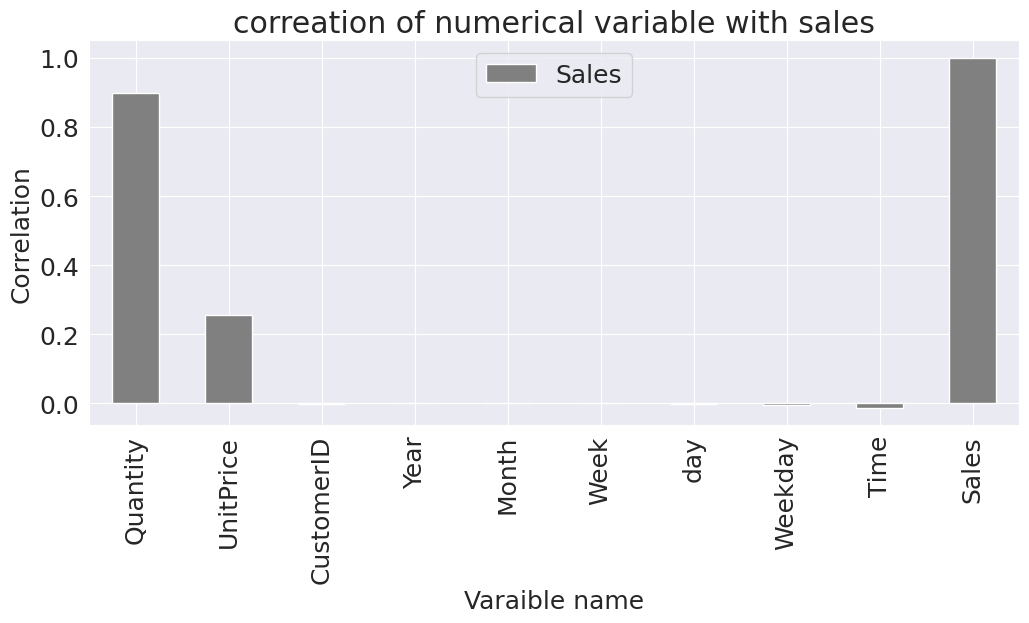

In [38]:
# ploting a graph of correation of numerical variable with sales
plt.figure(figsize=(12,5))
df.corr()['Sales'].plot(kind='bar', color ="grey")
plt.xlabel("Varaible name")
plt.ylabel("Correlation")
plt.title("correation of numerical variable with sales")
plt.legend()
plt.show()

* Qunatity and unit price highly correlated to Sales


# EDA OF DataFrame


# CustomerID with the highest Quantity

In [39]:
# sort the dataframe by Quantity in descending order
sorted_df = df.sort_values(by=['Quantity'], ascending=False)

# get the CustomerID with the highest Quantity
customer_id = sorted_df.iloc[0]['CustomerID']
highest_quantity = sorted_df.iloc[0]['Quantity']

print(f"CustomerID {customer_id}  bought the highest quantity of {highest_quantity}.")

CustomerID 16446  bought the highest quantity of 80995.


# Top 10 Customer By Qunatity

In [40]:
customer_totals = df.groupby('CustomerID')['Quantity'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)

# get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by Quantity:")
print(top_10_customers)

Top 10 Customers by Quantity:
CustomerID
15287    423379
14646    197687
16446    161992
12346    148430
14911     83575
12415     77802
17450     70937
17511     66086
13694     64725
18102     64126
Name: Quantity, dtype: int64


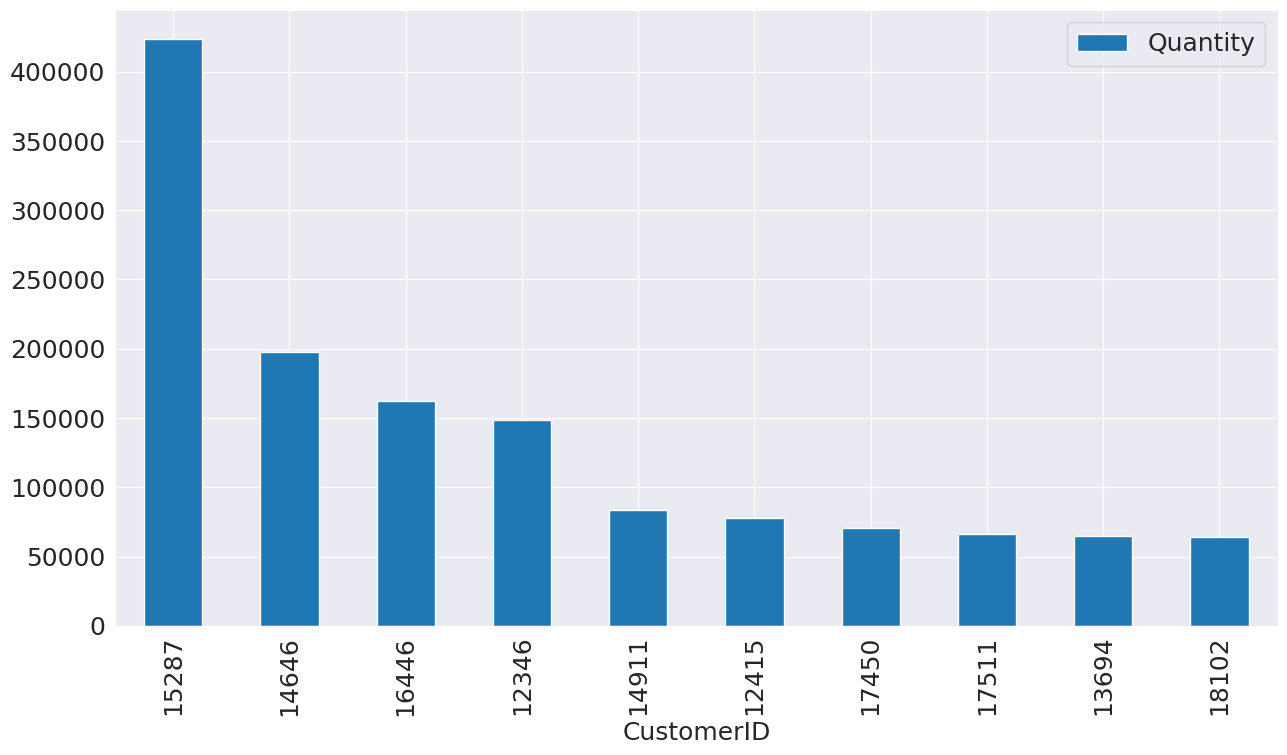

In [41]:
sorted_totals.head(10).plot(kind="bar")
plt.legend()
plt.show()

# Time Of day barChart

In [42]:
fig = px.bar(data_frame = df.groupby(by=["Time of Day"]).size().reset_index(name="counts"),
            x="Time of Day", y="counts")
fig.show()

# PieChat of Time of day

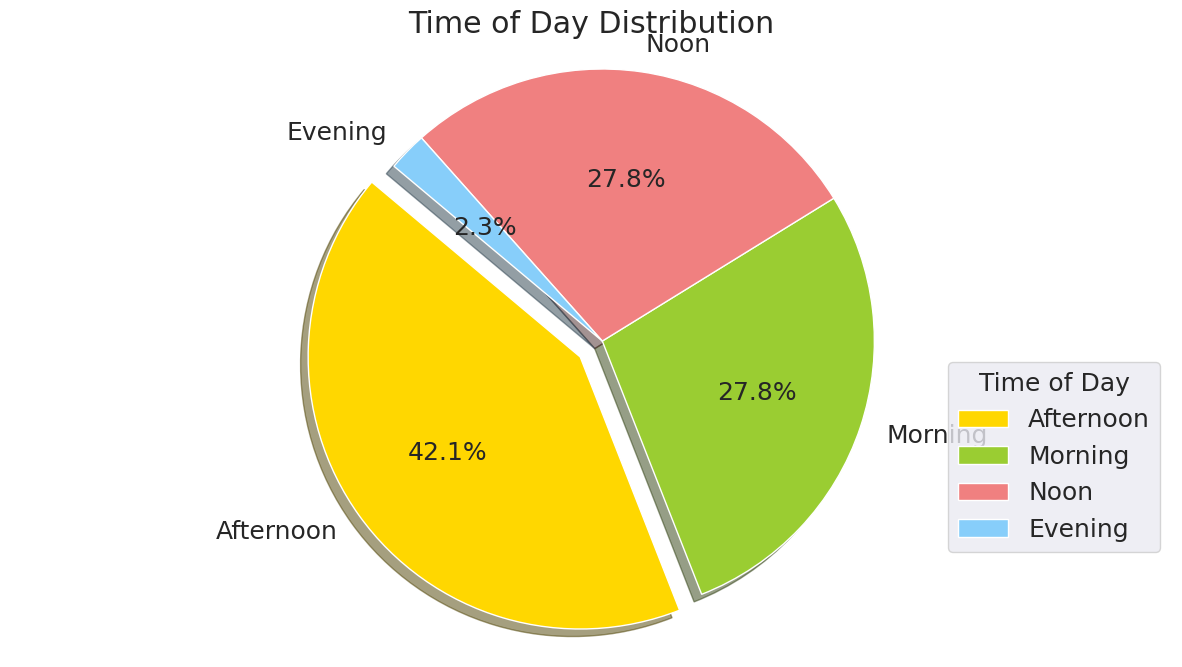

In [43]:
counts = df['Time of Day'].value_counts()

# Data
labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Time of Day Distribution')

plt.axis('equal')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

# Time of day Vs Sales

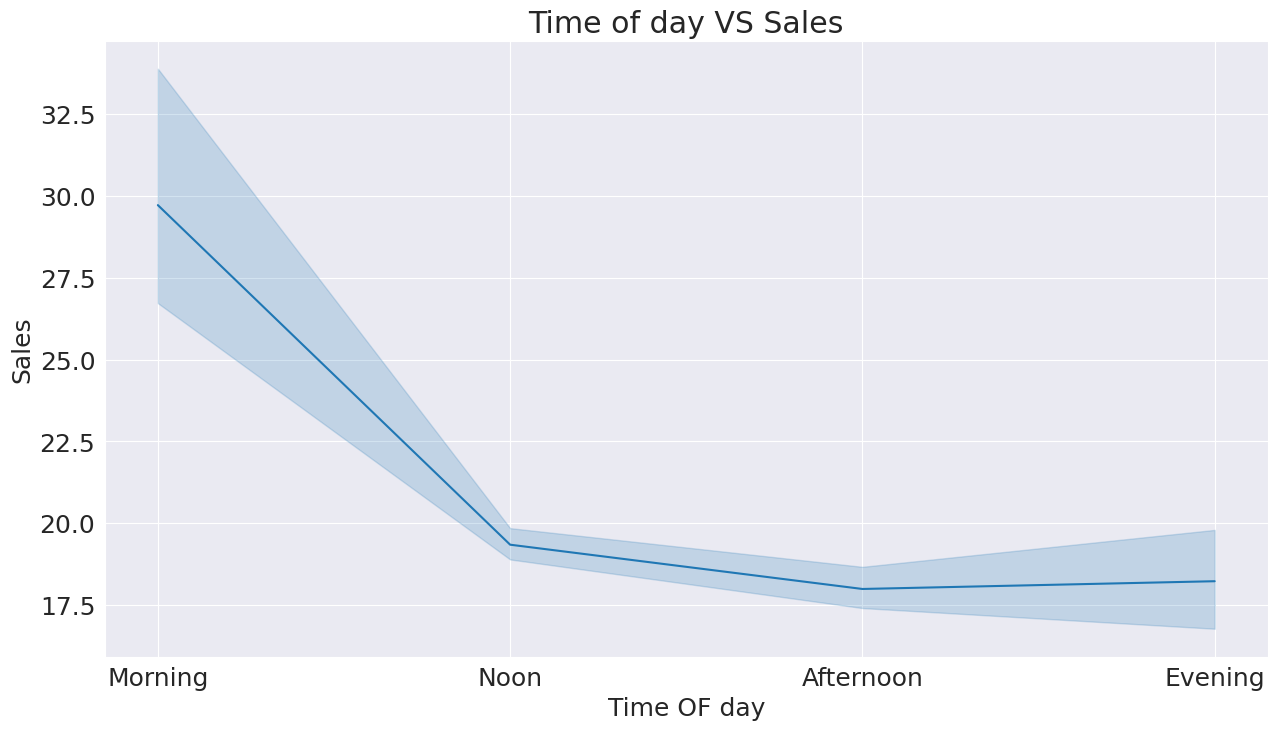

In [44]:
sns.lineplot(data= df,x="Time of Day", y ='Sales')
plt.xlabel("Time OF day")
plt.ylabel("Sales")
plt.title("Time of day VS Sales")

plt.show()

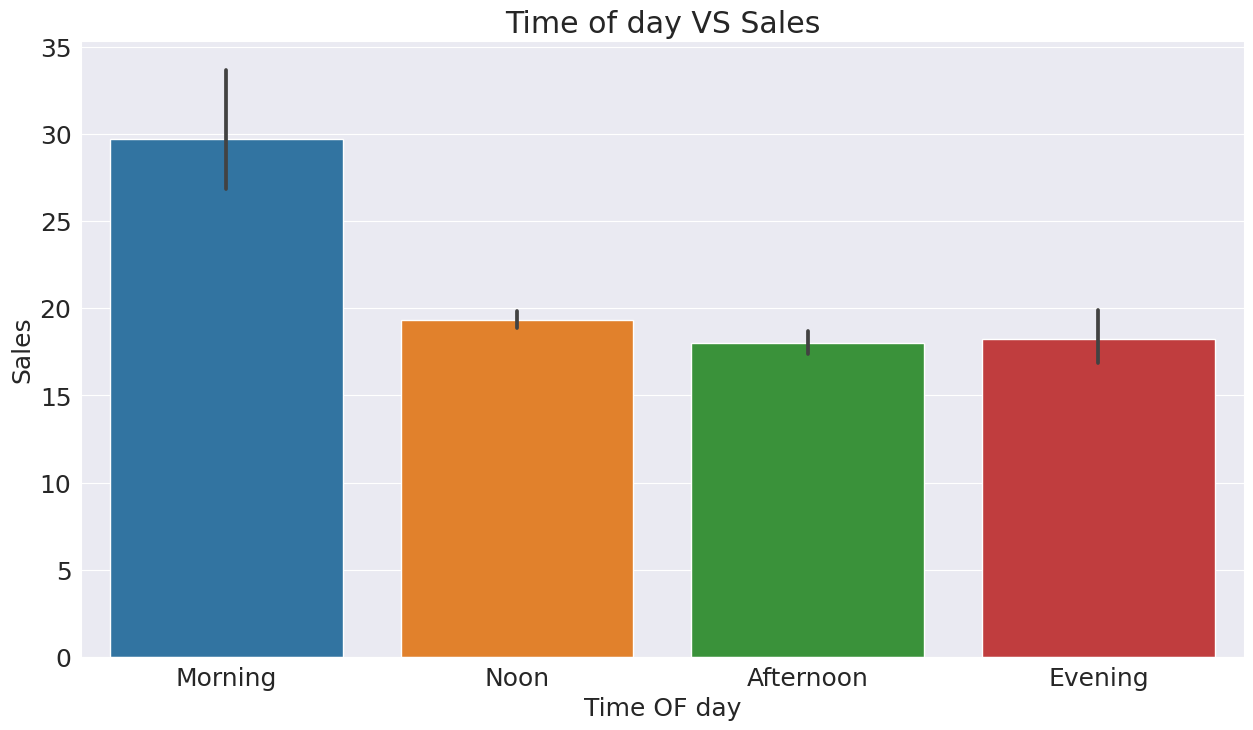

In [45]:
sns.barplot(data = df, x="Time of Day", y ='Sales')
plt.xlabel("Time OF day")
plt.ylabel("Sales")
plt.title("Time of day VS Sales")
plt.show()

* During Morning time sales is maximum 
* In Afternoon sales is minimun

# Top 10 Product Description


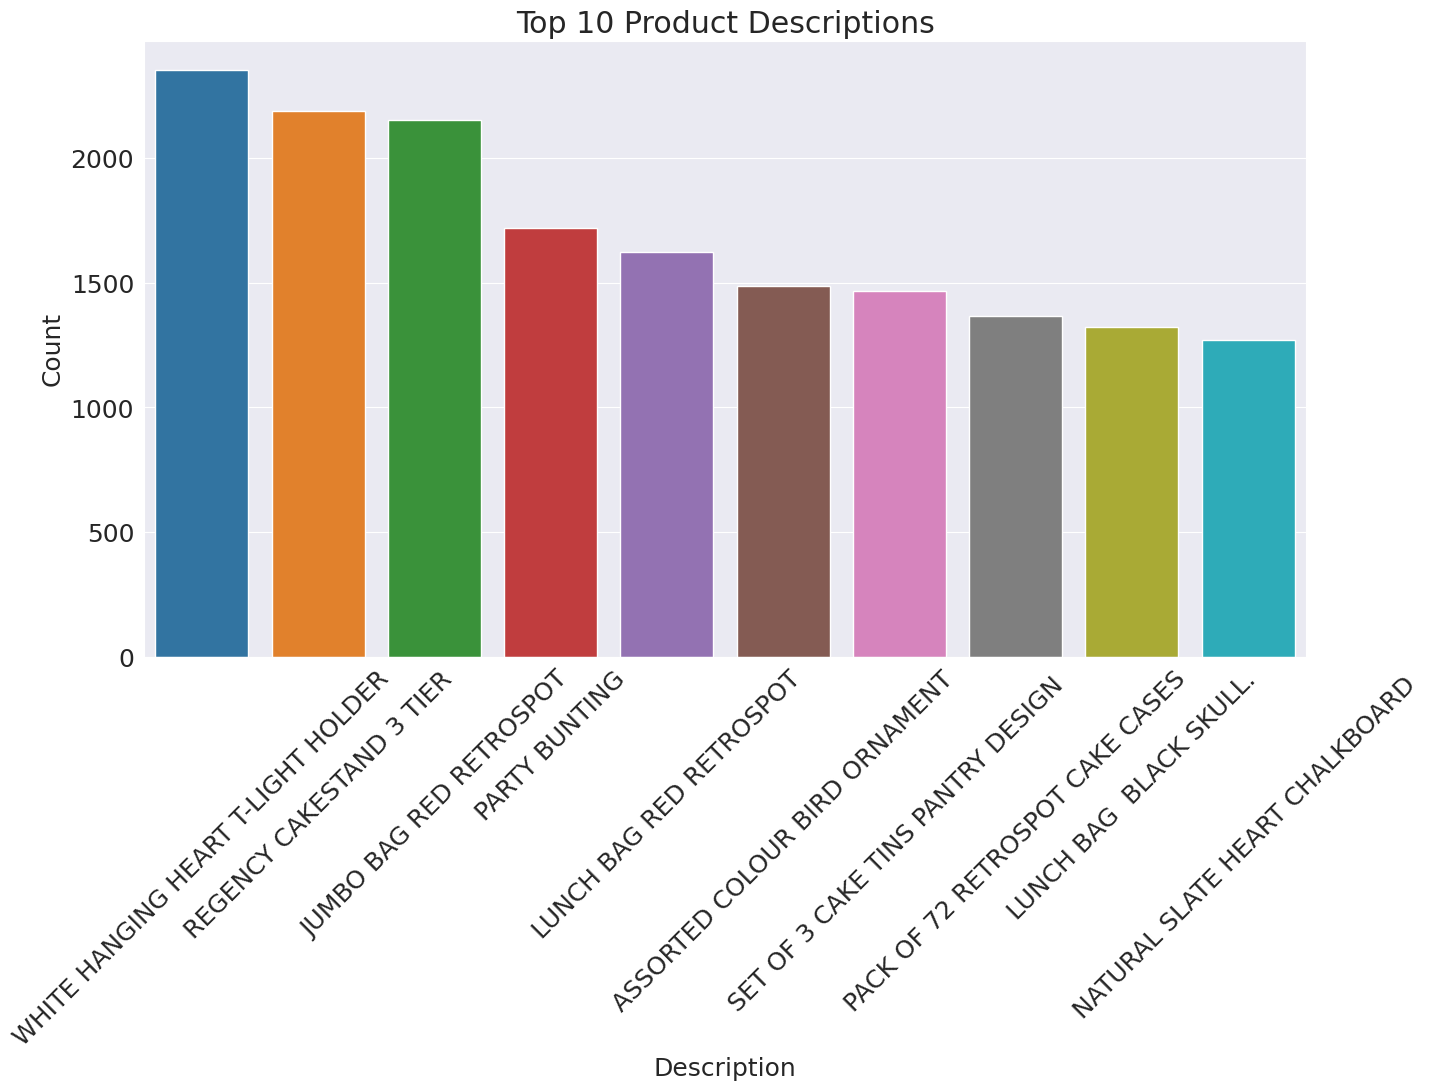

In [46]:
top_10_descriptions = df['Description'].value_counts().nlargest(10)

# Create a bar chart using Seaborn
sns.barplot(y=top_10_descriptions.values, x=top_10_descriptions.index)
plt.ylabel('Count')
plt.xlabel('Description')
plt.xticks(rotation=45)
plt.title('Top 10 Product Descriptions')
plt.show()

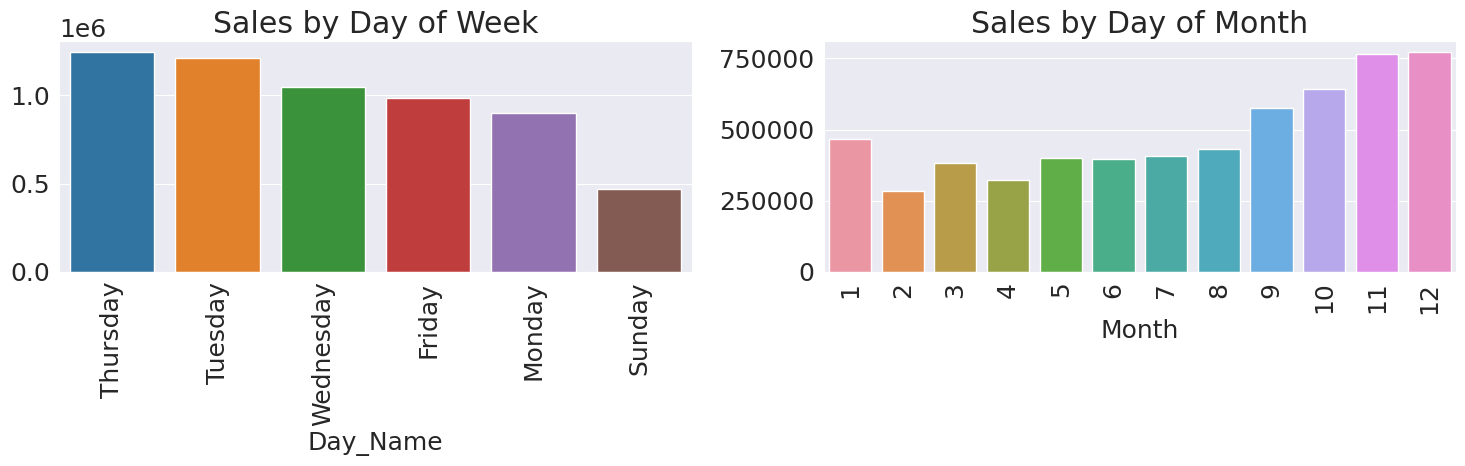

In [47]:
sales_by_day_of_week = df.groupby('Day_Name')['Quantity'].sum().sort_values(ascending=False)

sales_by_day_of_month = df.groupby('Month')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values)
plt.title('Sales by Day of Week')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x=sales_by_day_of_month.index, y=sales_by_day_of_month.values)
plt.title('Sales by Day of Month')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

* Thrusday and Tuesday has highest sales in weeks
* November has higest sales in month 

# sales Vs Country graph

Country
United Kingdom    4907952
Netherlands        201170
EIRE               151793
Germany            120969
France             113683
Australia           84447
Sweden              36524
Switzerland         30922
Spain               29060
Japan               26814
Name: Quantity, dtype: int64


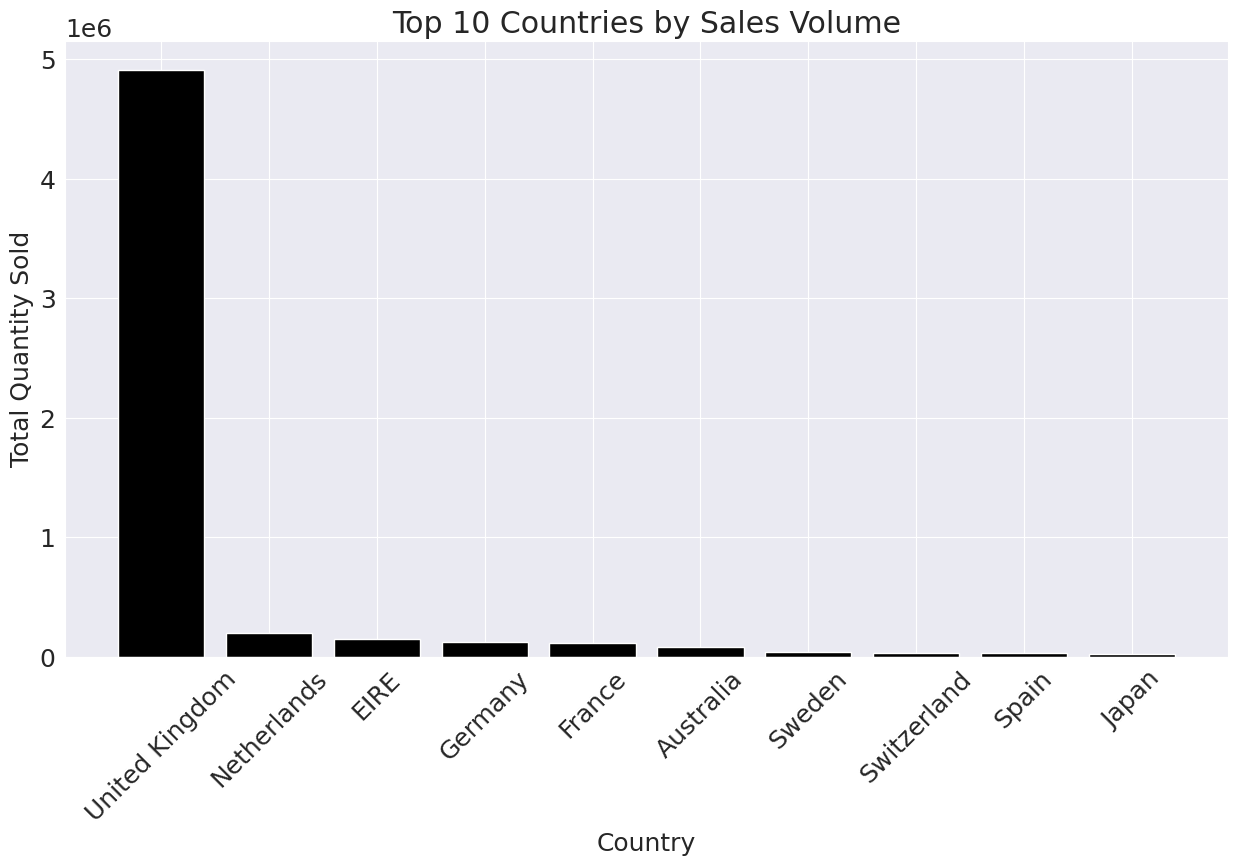

In [48]:
# Grouping data by country and calculating total sales
grouped_df = df.groupby('Country')['Quantity'].sum()

# Sorting data in descending order and selecting the first 10 values
top_10_countries = grouped_df.sort_values(ascending=False)[:10]
print(top_10_countries)

# Plotting
plt.bar(top_10_countries.index, top_10_countries.values, color ='Black')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Countries by Sales Volume')
plt.show()

* United Kingdom(UK) has higest number of goods sold
* Netherland, EIRE, Germany has almost same no of goods sold
* Japan and spain has least number of goods sold

# Unit Price vs Country

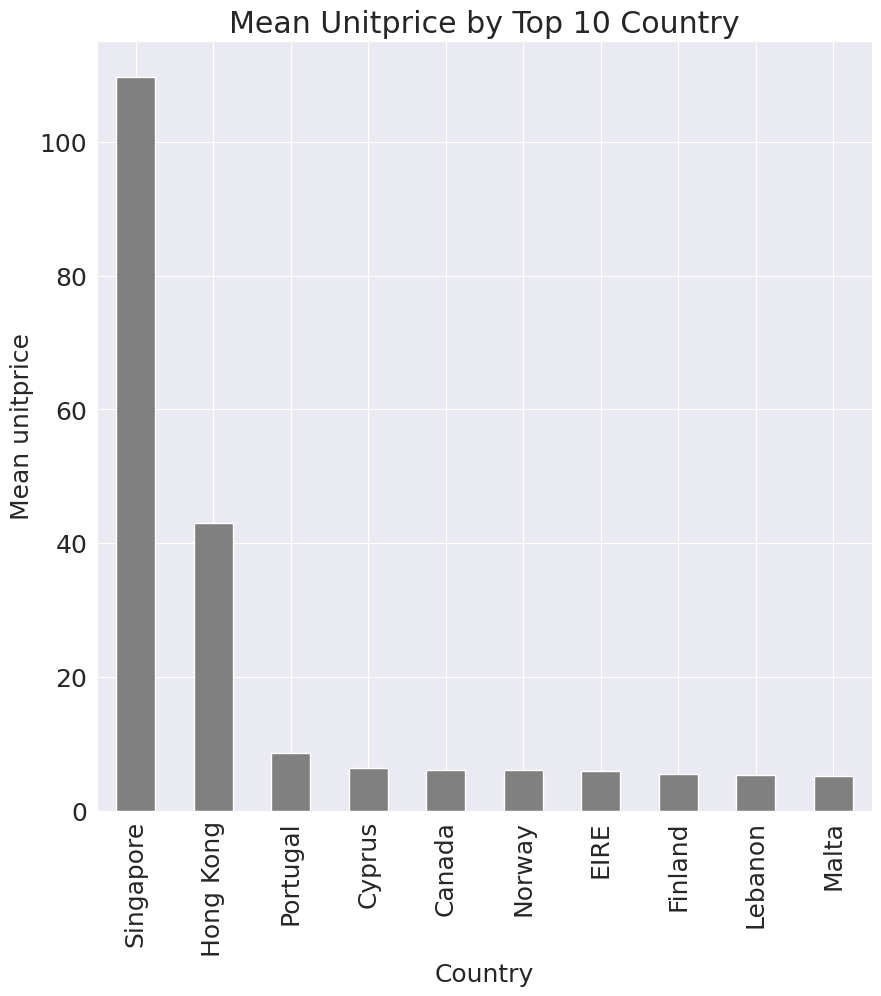

In [49]:
# unitprice vs Country
# Grouping data by country and calculating total sales
# Sorting data in descending order and selecting the first 10 values
mean_quantity_by_country = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending =False)[:10]
plt.figure(figsize=(10, 10))
mean_quantity_by_country.plot(kind='bar', color ='Grey')
plt.xticks(rotation=90)
plt.title('Mean Unitprice by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Mean unitprice')
plt.show()

* Singapore has higest average unit price 
* Hongkong has second highest unit price 
* while canada, Norway, Finland, Lebanon, Malta has similar averger unit price

# Sales Distribution
1. Which country have the most transaction sales?
2. Which year that have the most sales?
3. Which month that have the most sales?
4. Which day that have the most sales?
5. Top 10 item that have the most sales.
6. Sales Vs Time

# Which Country have the Most of Sales

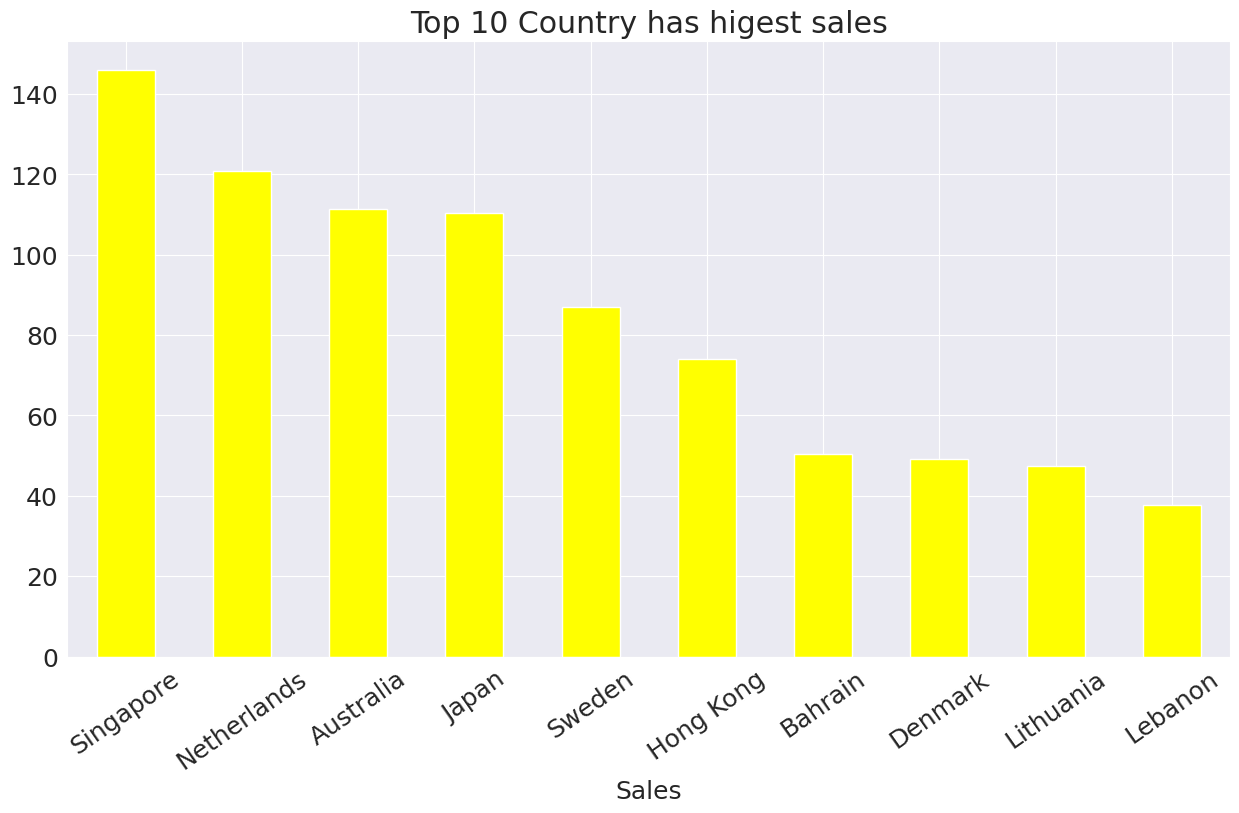

In [50]:
# 1. which country has higest sales
df_country = df.groupby('Country')['Sales'].mean().sort_values(ascending =False)[:10]
df_country.plot(kind='bar', color ='yellow')
plt.title("Top 10 Country has higest sales")
plt.xlabel('Sales')
plt.xticks(rotation=35)
plt.show()

* Singapore has higest sales 
* Netherlands has 2nd highest sales
* Japan and Australia has similar sales 
* Baharin, Denmark, lithuania has least sales 

# Which year that have the most sales?

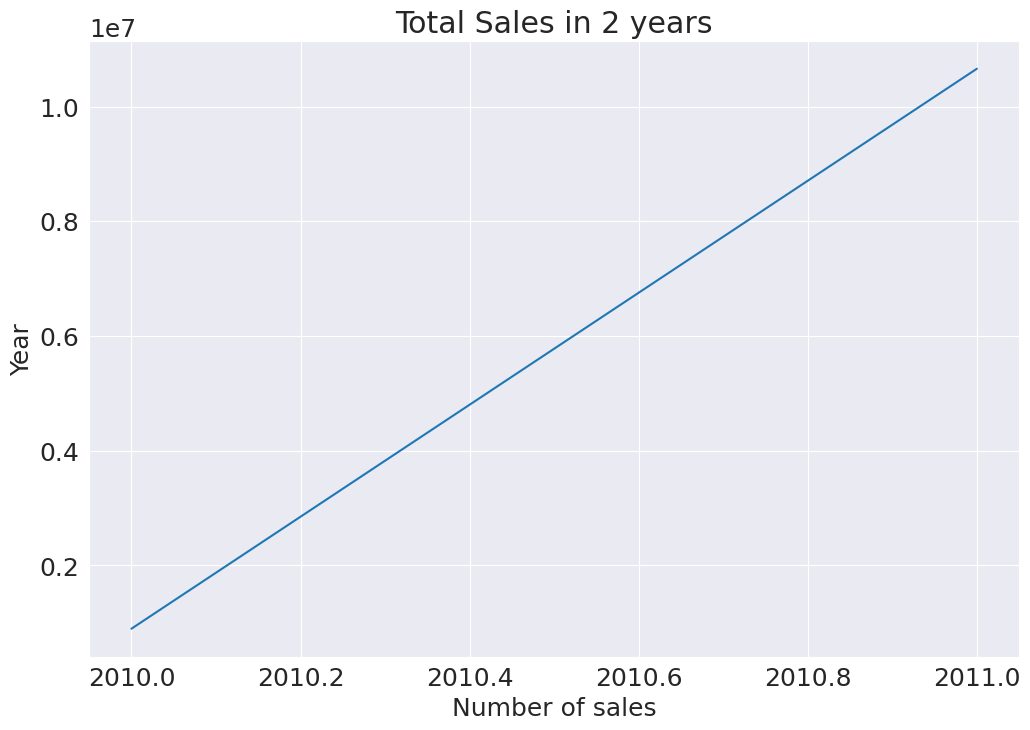

In [51]:
df_year = df.groupby(by=['Year']).sum()['Sales'].plot(kind='line',figsize=(12,8))
plt.title('Total Sales in 2 years')
plt.xlabel('Number of sales')
plt.ylabel('Year')
plt.show()

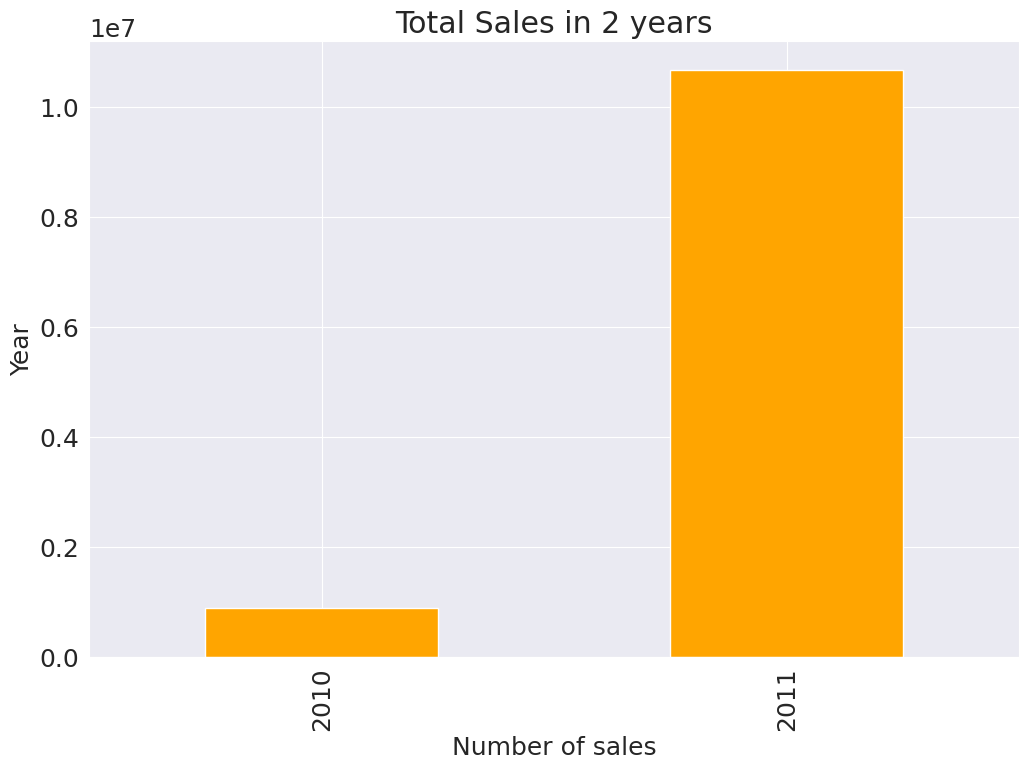

In [52]:
df_year = df.groupby(by=['Year']).sum()['Sales'].plot(kind='bar',figsize=(12,8), color ='orange')
plt.title('Total Sales in 2 years')
plt.xlabel('Number of sales')
plt.ylabel('Year')
plt.show()

* 2011 has higest sales as compare to 2010
* sales growth is linearly straight line W.R.T Year

# which Month has most sales?


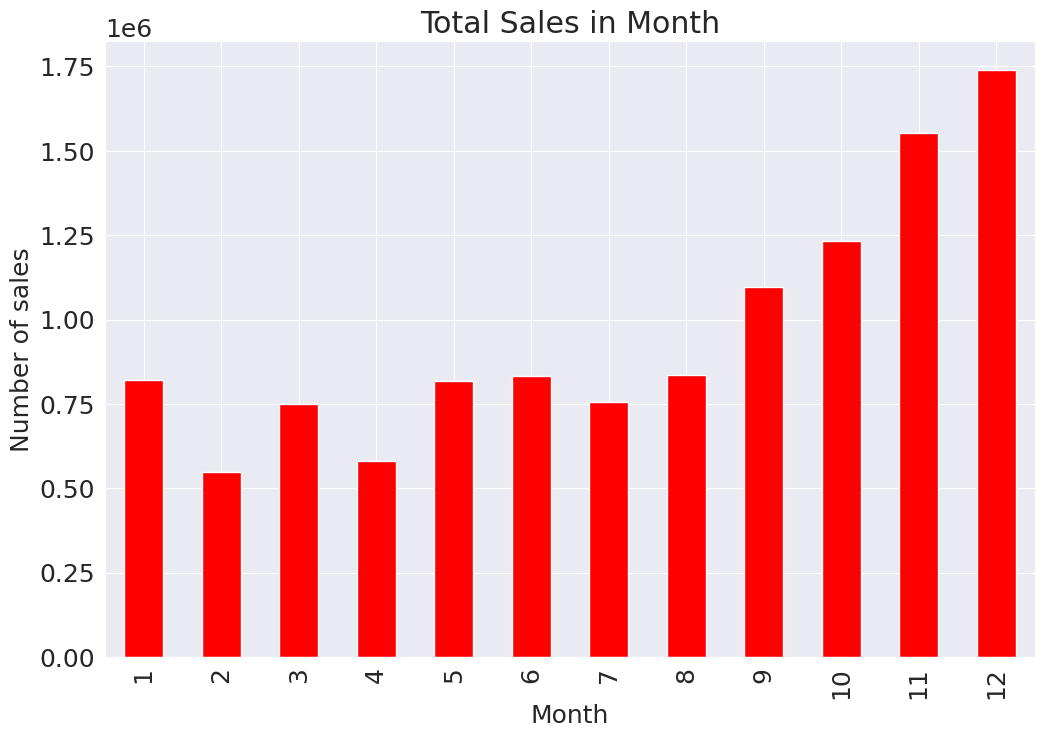

In [53]:
df_year = df.groupby(by=['Month']).sum()['Sales'].plot(kind='bar',figsize=(12,8), color ='red')
plt.title('Total Sales in Month')
plt.ylabel('Number of sales')
plt.xlabel('Month')
plt.show()

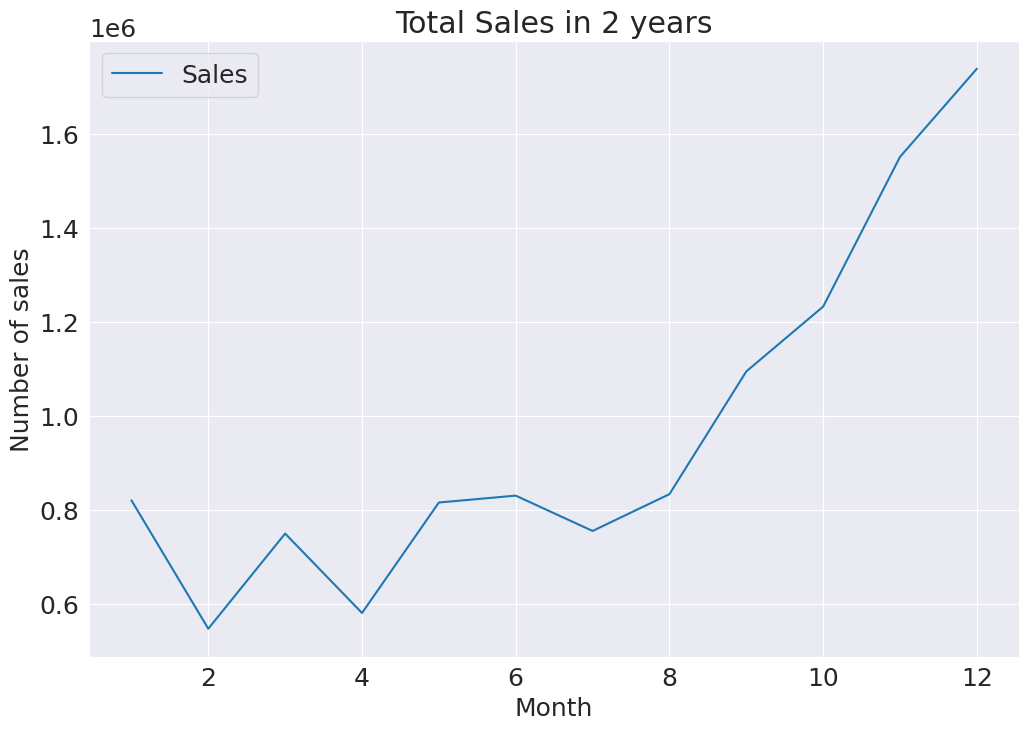

In [54]:
df_year = df.groupby(by=['Month']).sum()['Sales'].plot(kind='line',figsize=(12,8))
plt.title('Total Sales in 2 years')
plt.ylabel('Number of sales')
plt.xlabel('Month')
plt.legend()
plt.show()

1. starting of the year the sales has decrese
2. After Apirl the sales has increase
3. during summer season there is less sales
4. during winter season the sales incease while in rainy sales is stable
5. In December highest sales happend while in april and Feb there is least sales


# Which day that have the most sales?

In [55]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month',
       'Month_Name_year_wise', 'Week', 'day', 'Weekday', 'Day_Name', 'Time',
       'Time of Day', 'Sales'],
      dtype='object')

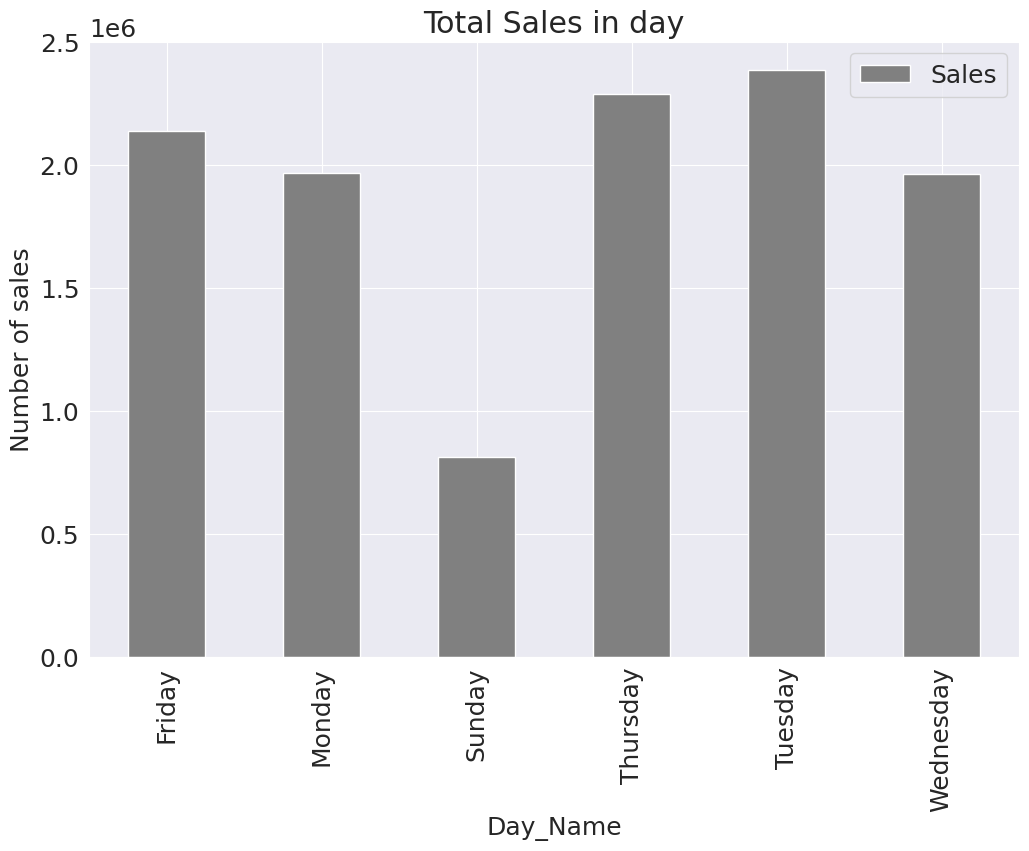

In [56]:
df_day = df.groupby(by=['Day_Name']).sum()['Sales'].plot(kind='bar',figsize=(12,8), color ='grey')
plt.title('Total Sales in day')
plt.ylabel('Number of sales')
plt.xlabel('Day_Name')
plt.legend()
plt.show()

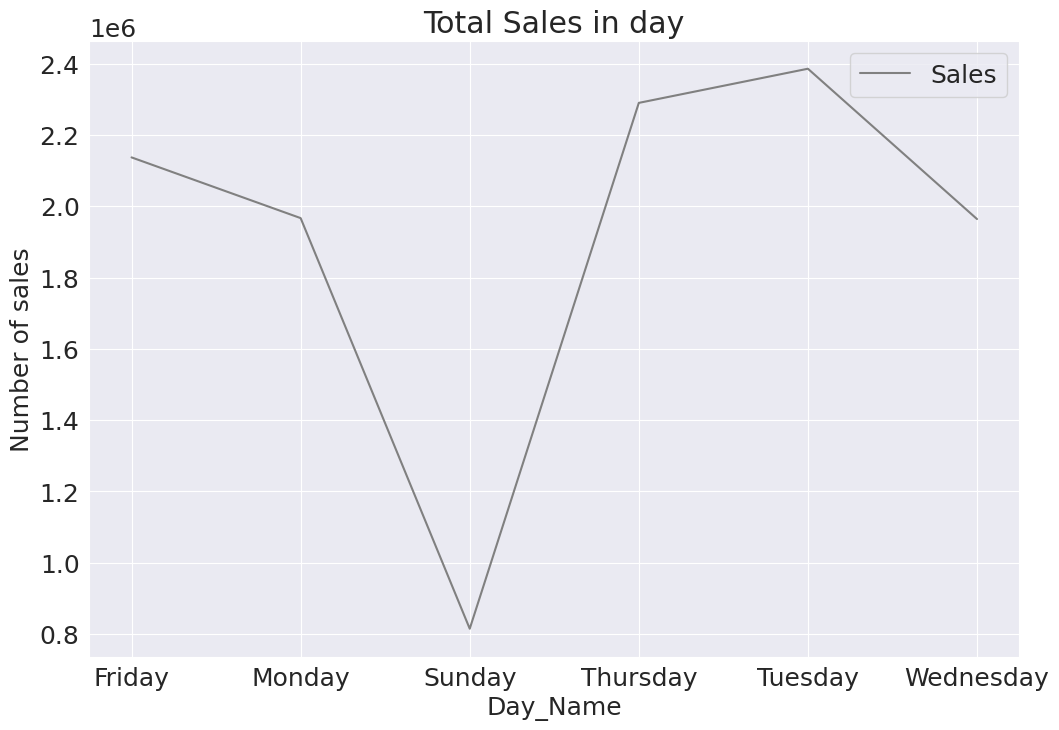

In [57]:
df_day = df.groupby(by=['Day_Name']).sum()['Sales'].plot(kind='line',figsize=(12,8), color ='grey')
plt.title('Total Sales in day')
plt.ylabel('Number of sales')
plt.xlabel('Day_Name')
plt.legend()
plt.show()

1. sunday has least sales 
2. Monday and wednesday has similar sales which 2 lakhs
3. Thrusday has 2nd higest sales

# Sales Vs Time

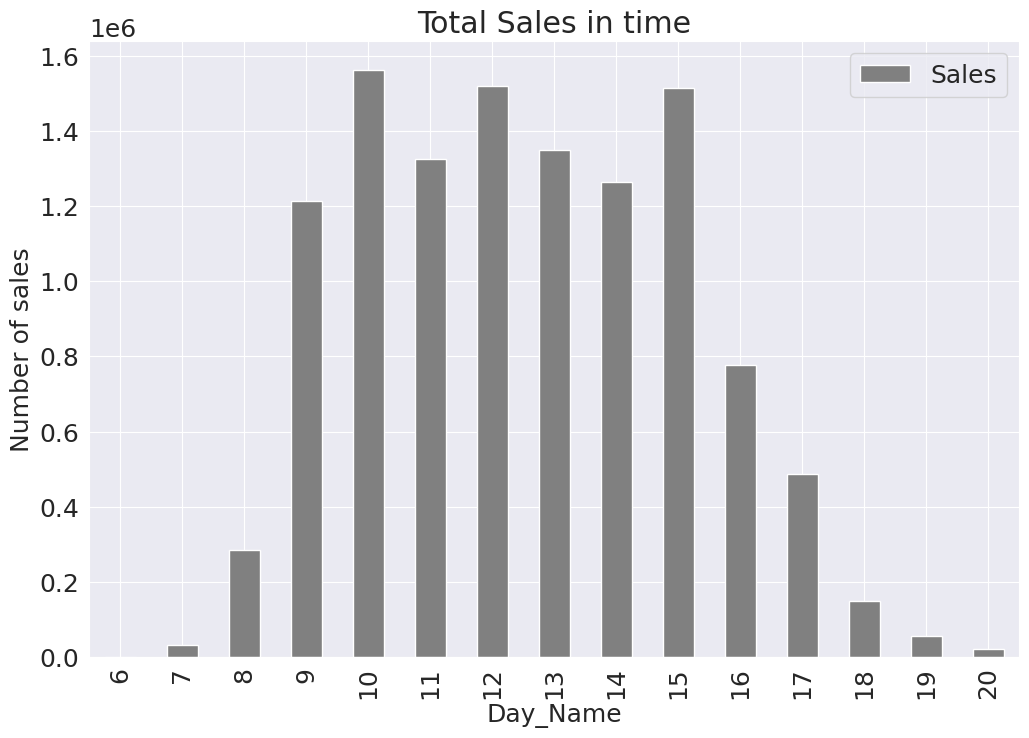

In [58]:
df_day = df.groupby(by=['Time']).sum()['Sales'].plot(kind='bar',figsize=(12,8), color ='grey')
plt.title('Total Sales in time')
plt.ylabel('Number of sales')
plt.xlabel('Day_Name')
plt.legend()
plt.show()

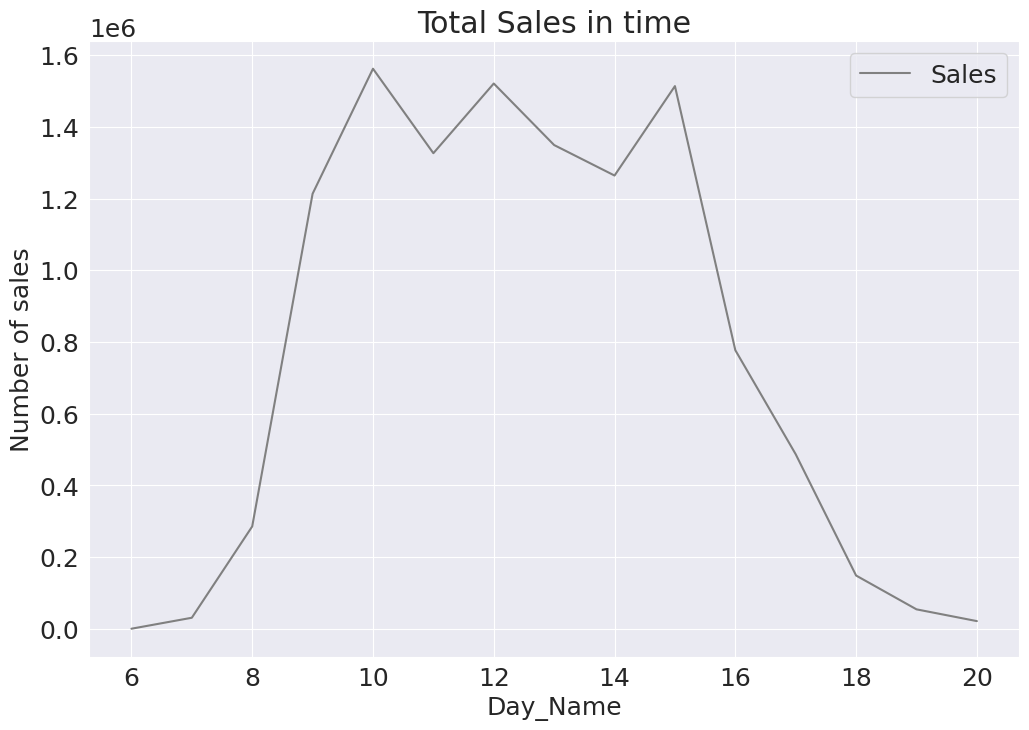

In [59]:
df_day = df.groupby(by=['Time']).sum()['Sales'].plot(kind='line',figsize=(12,8), color ='grey')
plt.title('Total Sales in time')
plt.ylabel('Number of sales')
plt.xlabel('Day_Name')
plt.legend()
plt.show()

1. During 9AM to 4PM There is higest sales
2. there is sales in early moring which around 6 am
3. leat sales happend during 8pm onwards 

# Feature Engineering

# ploting hist plot of numerical columns

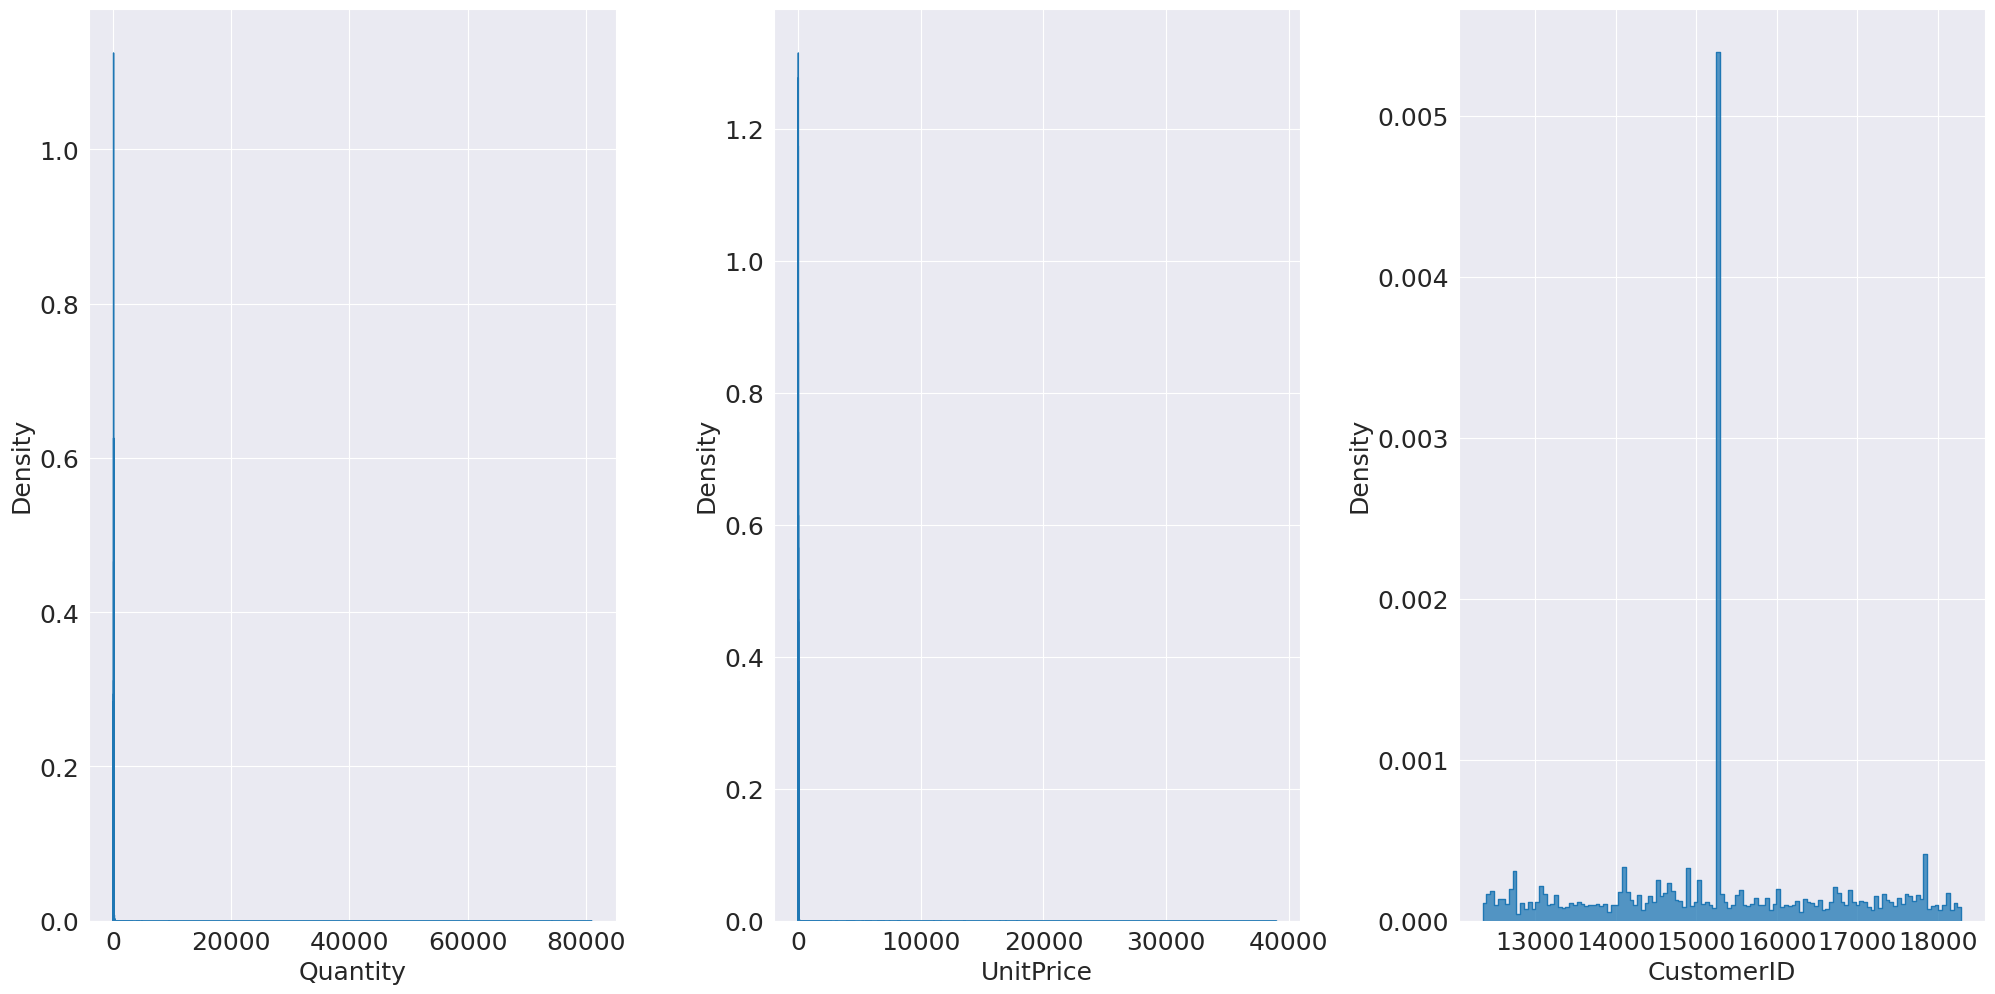

In [60]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_cols:
    if col != 'type':
        sns.histplot(df, x=col, element="step", stat="density", common_norm=False, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)



\

# Plot KDE plot of Numerial columns

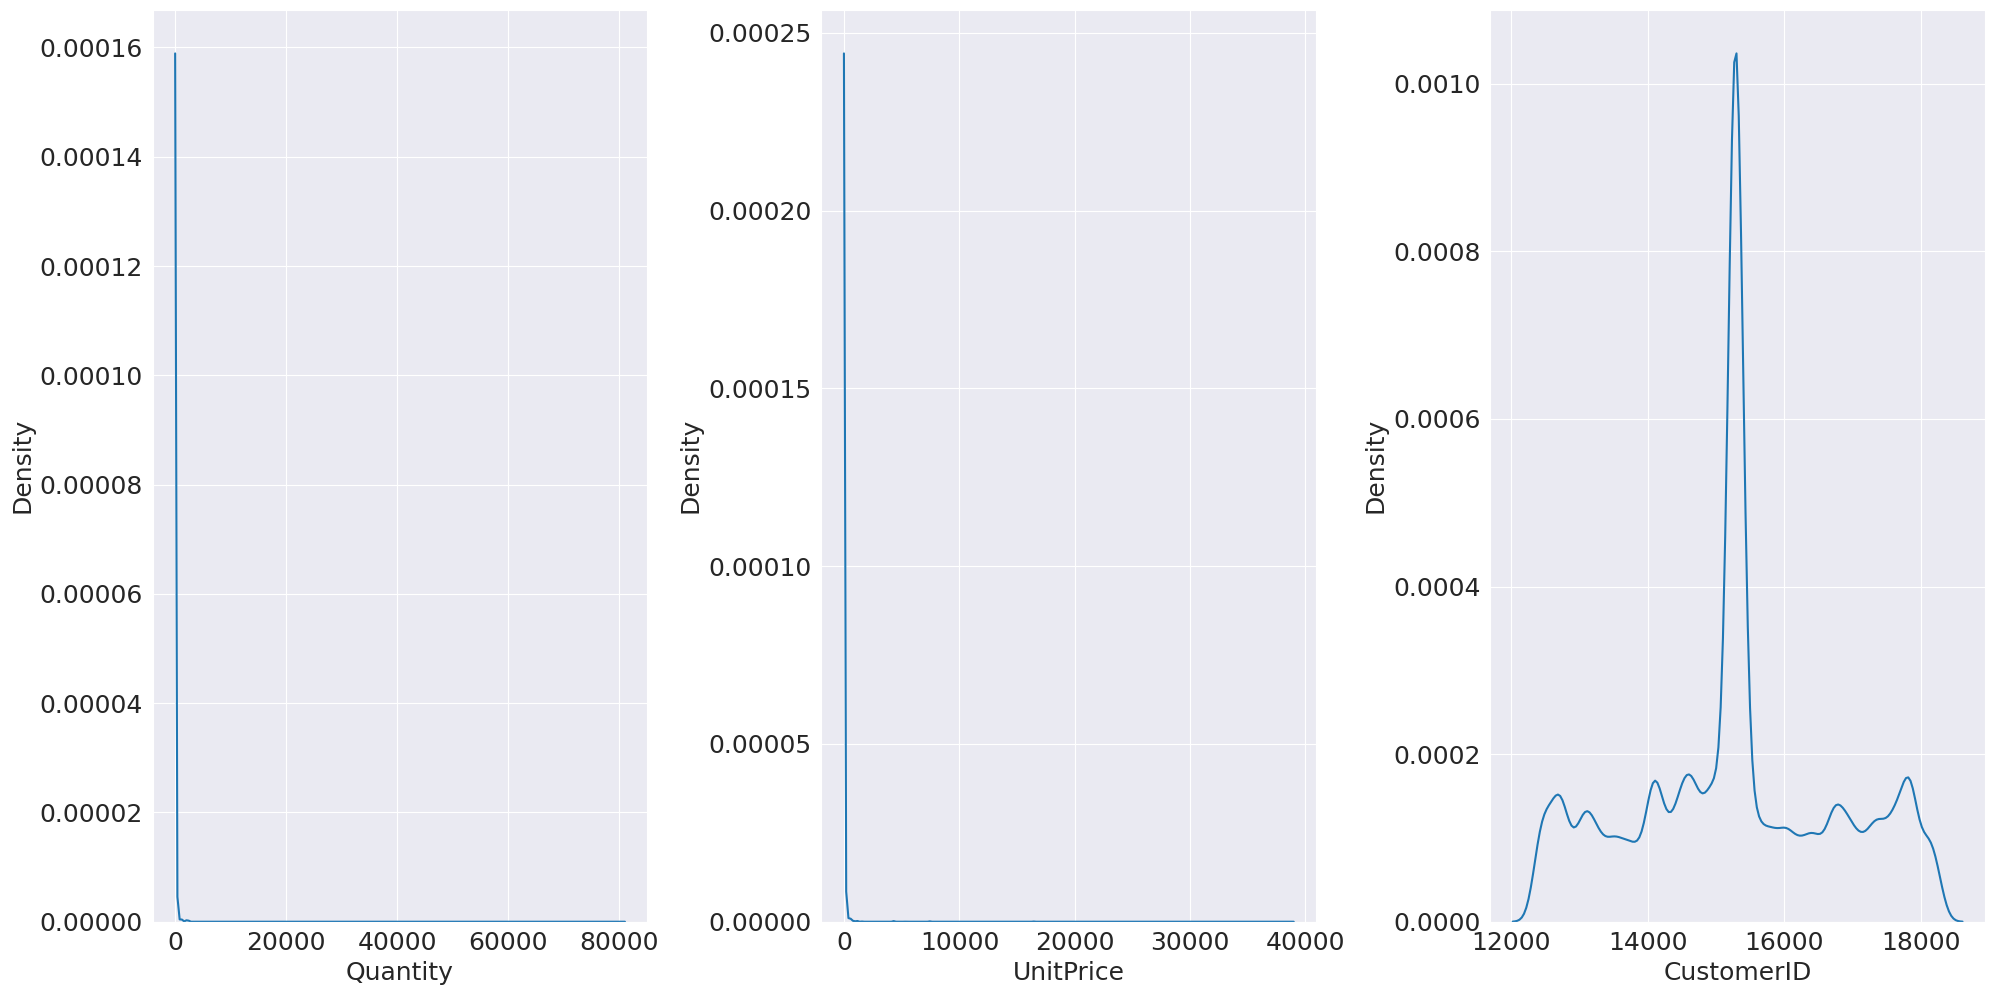

In [61]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_cols:
    if col != 'type':
        sns.kdeplot(df, x=col, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# detecting Outliear using Box plot

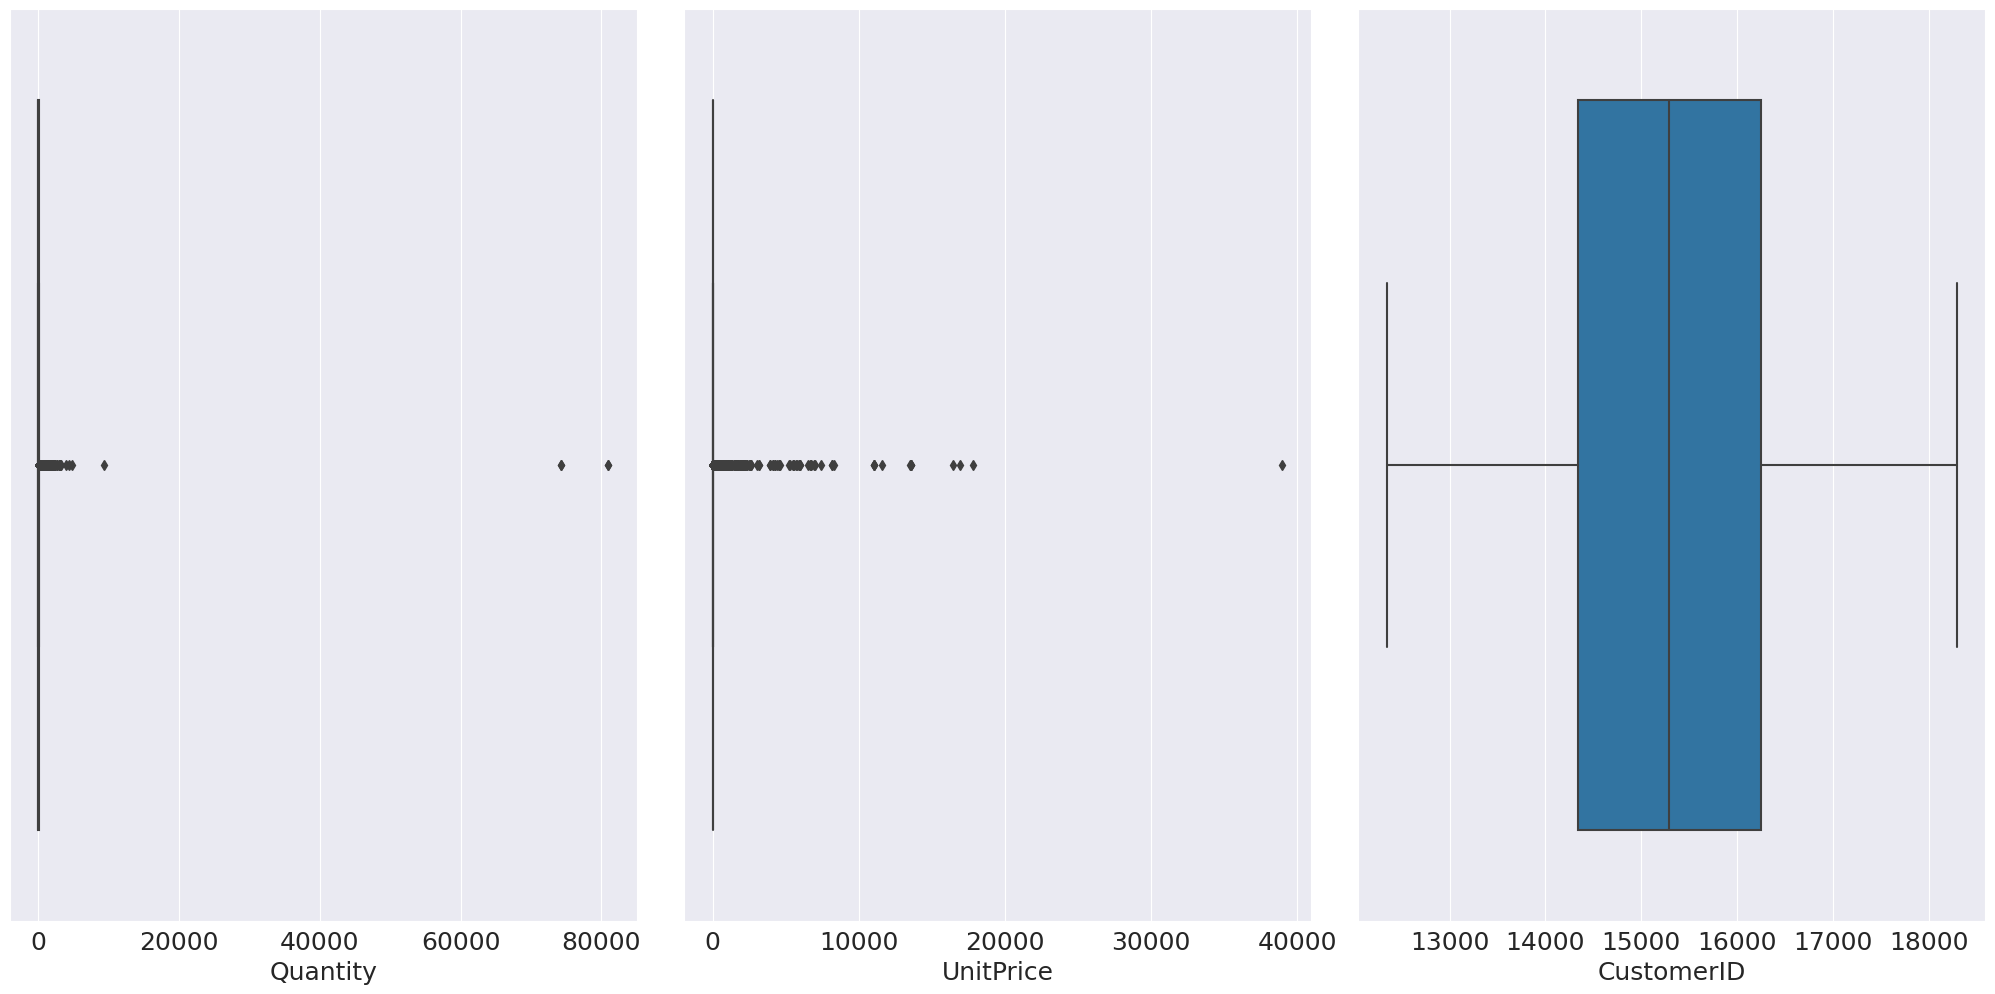

In [62]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_cols:
    if col != 'type':
        sns.boxplot(df, x=col,  ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

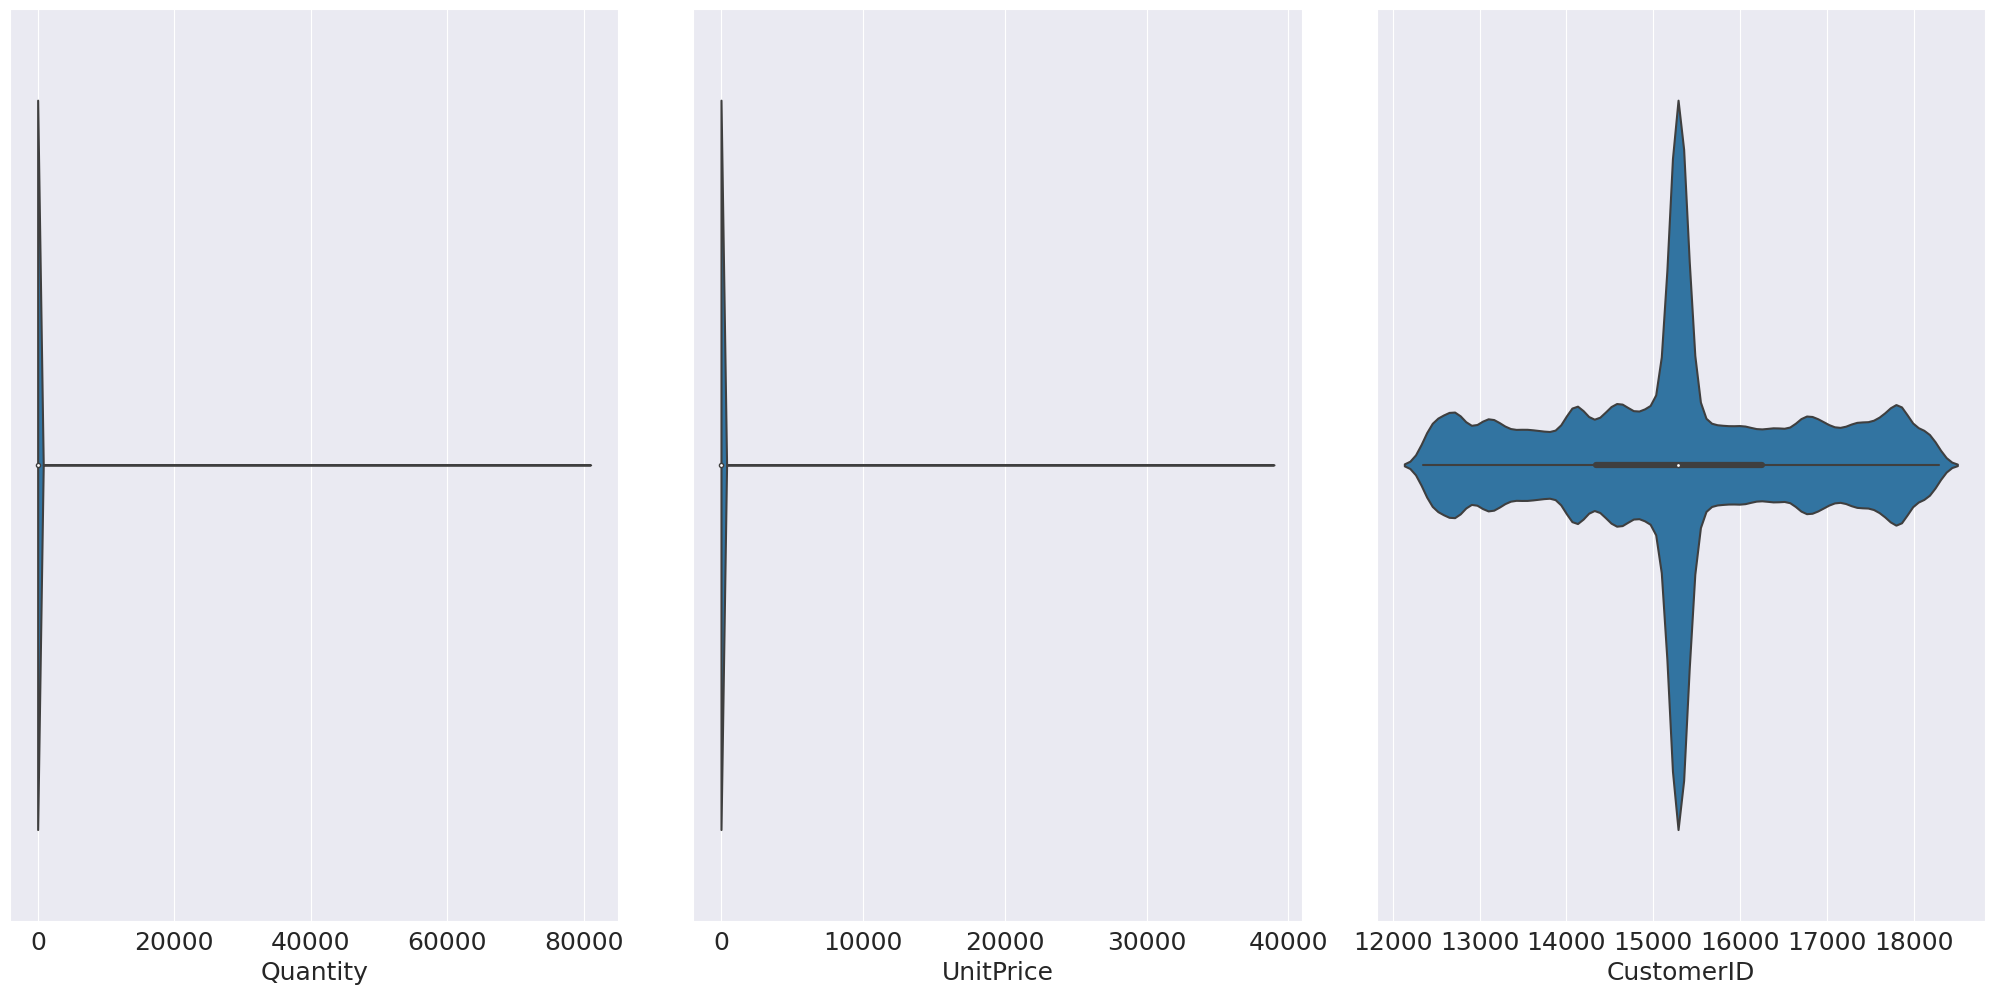

In [63]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_cols:
    if col != 'type':
        sns.violinplot(df, x=col,  ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

1. Unit price, Quantity  and Sales has outies

# Types of Features:

1. Numerical Feature

In [64]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 10


2. Categorical feature

In [65]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


3. discrete Feature

In [66]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))

Num of Discrete Features : 4


In [67]:
year_features=[feature for feature in df.columns if 'Data' in feature or 'Month' in feature or "Year" in feature]
print('Num of Year Features :',len(year_features))

Num of Year Features : 3


# continues Feature

In [68]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature+year_features]
print('Num of Continuous Features :',len(continuous_feature))

Num of Continuous Features : 6


# Feature Selection

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [70]:
compute_vif(num_features, df)

,Variable,VIF
0,Quantity,7.546630
1,UnitPrice,1.540018
2,CustomerID,1.004268
3,Year,1.363101
4,Month,29485.050281
5,Week,29031.841311
6,day,194.947257
7,Weekday,9.741563
8,Time,1.005120
9,Sales,8.080709


1. Month,week,day,weekday has high vif values 

# Outlier removal and Checking skewness:

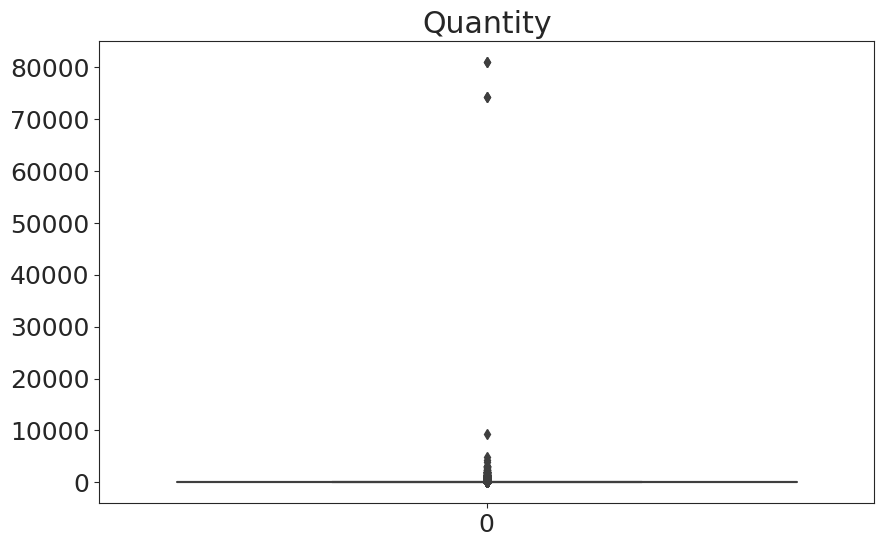

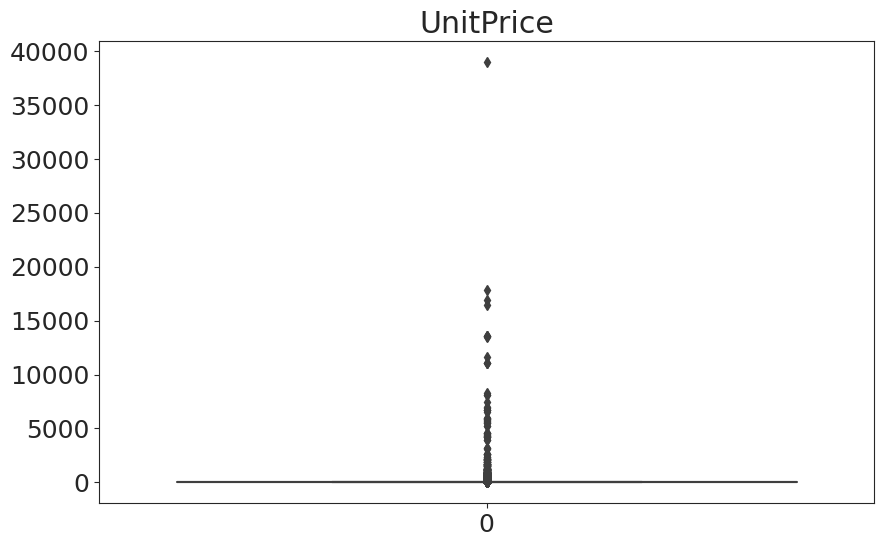

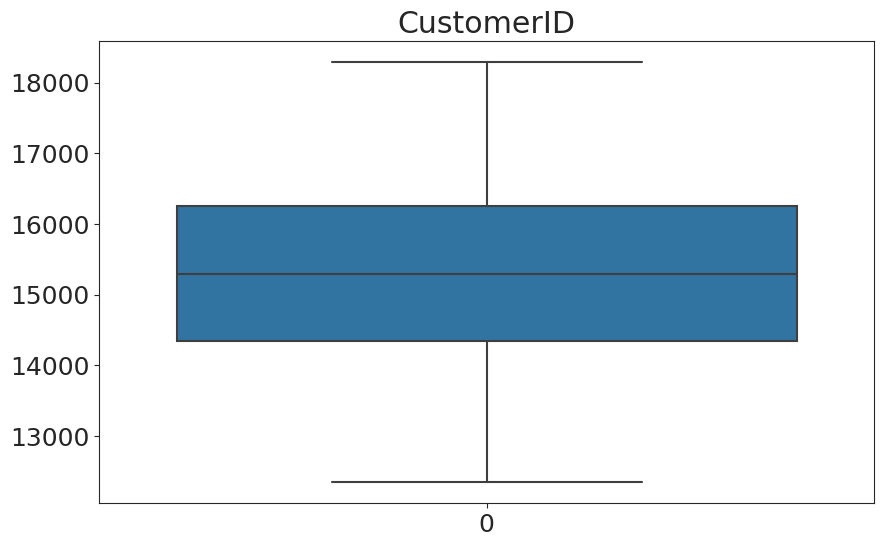

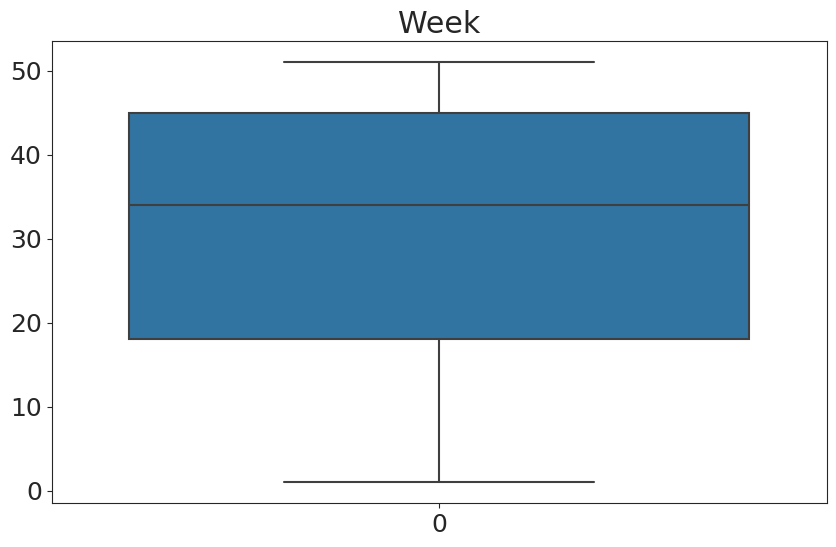

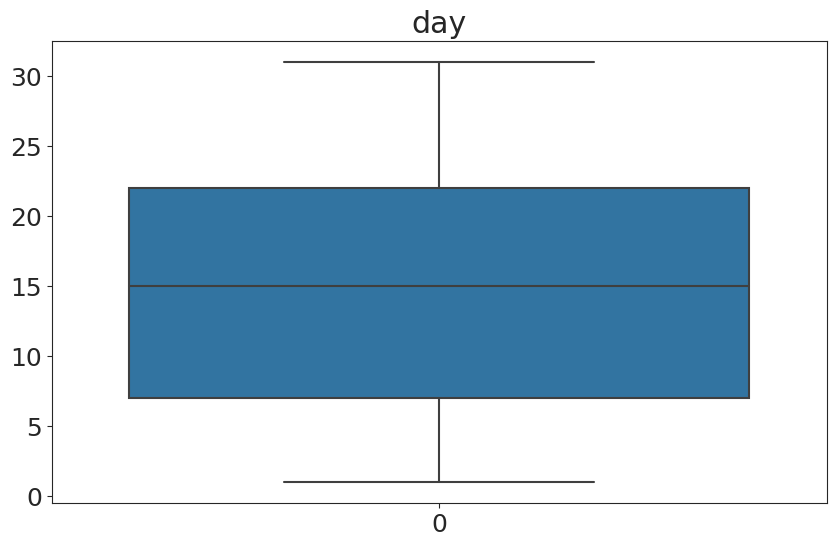

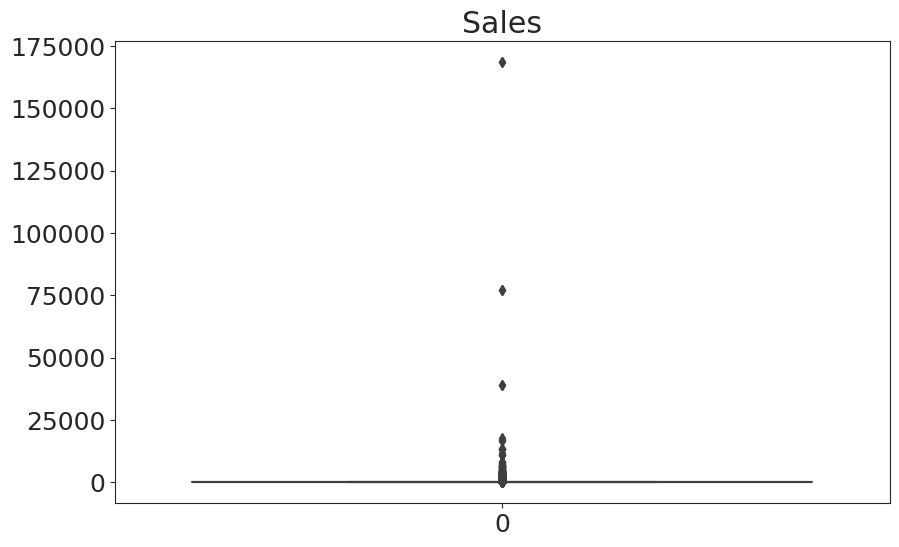

In [71]:
for i in continuous_feature:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])
        plt.title(i)

In [72]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [73]:
for col in continuous_feature:
         detect_outliers(col)


 #### Quantity ####
percentile25 1.0
percentile75 11.0
Upper limit 26.0
Lower limit -14.0

 #### UnitPrice ####
percentile25 1.25
percentile75 4.13
Upper limit 8.45
Lower limit -3.0700000000000003

 #### CustomerID ####
percentile25 14344.0
percentile75 16248.0
Upper limit 19104.0
Lower limit 11488.0

 #### Week ####
percentile25 18.0
percentile75 45.0
Upper limit 85.5
Lower limit -22.5

 #### day ####
percentile25 7.0
percentile75 22.0
Upper limit 44.5
Lower limit -15.5

 #### Sales ####
percentile25 3.9
percentile75 17.700000000000003
Upper limit 38.400000000000006
Lower limit -16.800000000000004


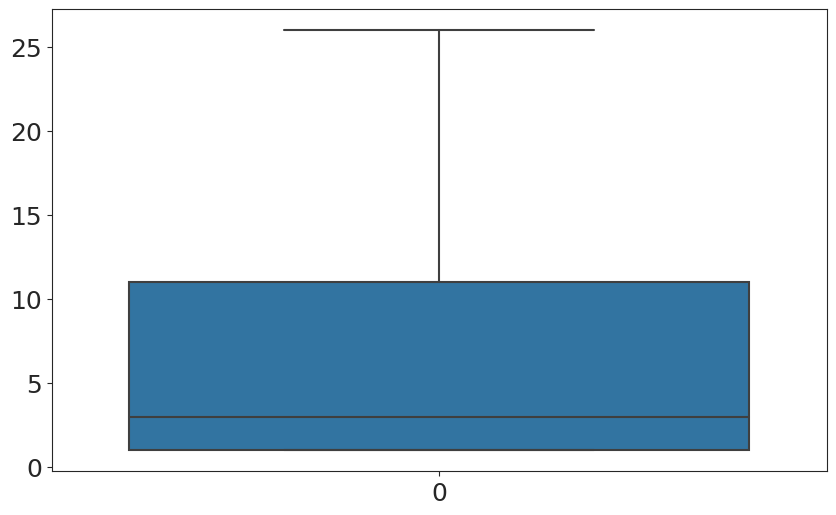

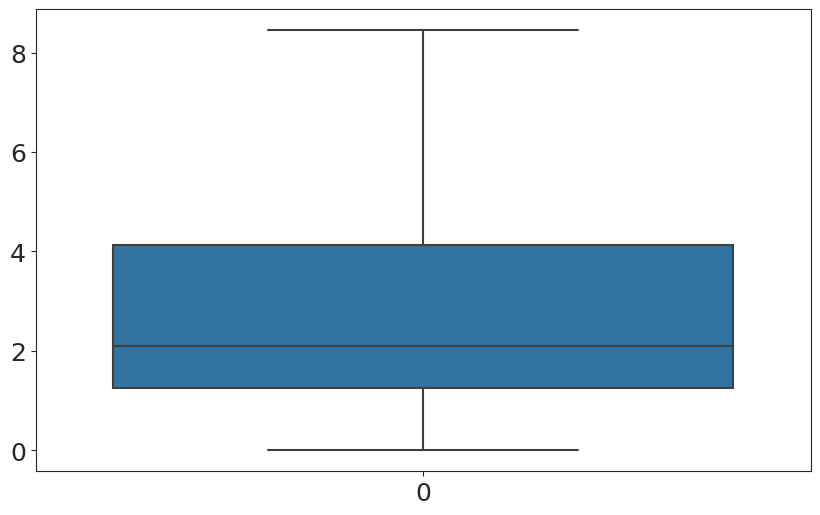

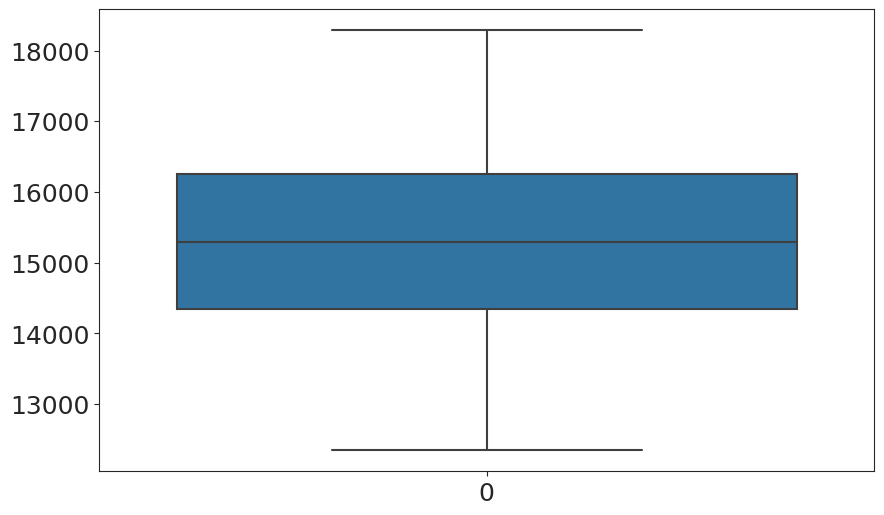

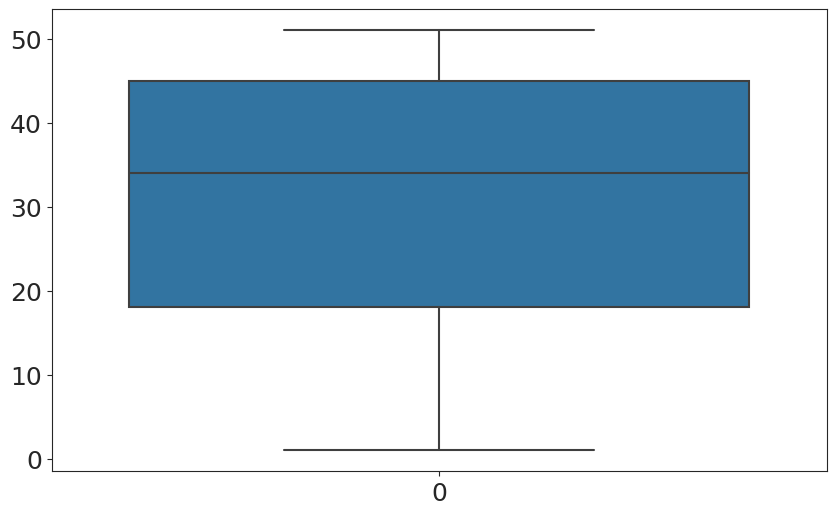

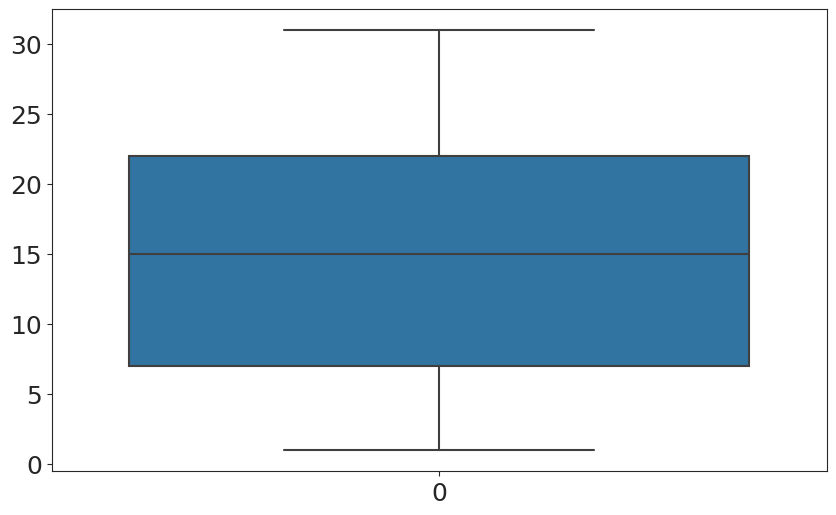

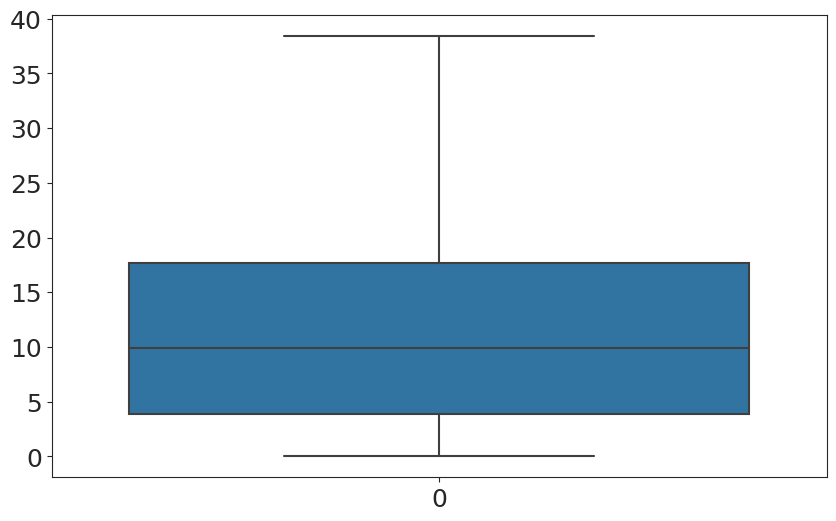

In [74]:
for i in continuous_feature:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

In [75]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Month_Name_year_wise,Week,day,Weekday,Day_Name,Time,Time of Day,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,December,48.0,1.0,2,Wednesday,8,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,December,48.0,1.0,2,Wednesday,8,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,December,48.0,1.0,2,Wednesday,8,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,December,48.0,1.0,2,Wednesday,8,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,December,48.0,1.0,2,Wednesday,8,Morning,20.34


In [76]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month',
       'Month_Name_year_wise', 'Week', 'day', 'Weekday', 'Day_Name', 'Time',
       'Time of Day', 'Sales'],
      dtype='object')

In [77]:
# droping unwanted columns
cols = ['InvoiceNo', 'StockCode', 'Description','InvoiceDate','CustomerID','Year', 'Month',
       'Month_Name_year_wise', 'Week', 'day', 'Weekday', 'Day_Name', 'Time',
       'Time of Day']
df.drop(columns = cols, inplace = True)

In [78]:
df.head()

,Quantity,UnitPrice,Country,Sales
0,6,2.55,United Kingdom,15.30
1,6,3.39,United Kingdom,20.34
2,8,2.75,United Kingdom,22.00
3,6,3.39,United Kingdom,20.34
4,6,3.39,United Kingdom,20.34


# Spliting of Dataframe

* **Spliting dataframe in X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the "Sales" column.** 

In [79]:
from sklearn.model_selection import train_test_split
X = df.drop(['Sales'], axis=1)
y = df['Sales']# 

In [80]:
# checking all columns in train dataset
all_columns  = list(X.columns)
print(all_columns) 
len(all_columns)

['Quantity', 'UnitPrice', 'Country']


3

# Feature Encoding:
* **Extracting Categorical features from train set for feature encoding**

In [81]:
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 1


In [82]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

Country : 38


# Data Transformation Pipeline
 **Label Encoding for Columns which had lesser unique values and not ordinal**

 
**Binary Encoder is used for Country which had 38 unique values**

In [83]:
# install the library
!pip install category-encoders
#pip uninstall category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [84]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders.binary import BinaryEncoder

num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
bin_columns = ['Country']

numeric_transformer = StandardScaler()
bin_transformer = BinaryEncoder()
#oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
         ('binary' ,bin_transformer, bin_columns),
         ("num", numeric_transformer, num_features)
    ]
)

In [85]:
X = preprocessor.fit_transform(X)

In [86]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.1185664 , -0.17698266],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.1185664 ,  0.17206835],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.14581143, -0.09387528],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.38294422,  0.48787641],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.38294422,  0.48787641],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.51513314,  0.82030595]])

In [87]:
import pickle
pickle.dump(preprocessor, open('preprocess.pkl', 'wb'))

# Spliting into Train and Test 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=36)
X_train.shape, X_test.shape

((400598, 8), (133533, 8))

In [89]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00


In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [91]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Logistic Regression": LinearRegression(),
    #"K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(), 
     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
     #"Support Vector Regressor": SVR(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
   # model_train_accuracy = model.score(y_train, y_train_pred) # Calculate Accuracy
    model_train_r2 = r2_score(y_train, y_train_pred) # Calculate R2-Score
    model_train_mse = mean_squared_error(y_train, y_train_pred) # Calculate Precision
    model_train_mae = mean_absolute_error(y_train, y_train_pred) # Calculate Recall


    # Test set performance
    #model_test_accuracy = model.score(y_test, y_test_pred) # Calculate Accuracy
    model_test_r2 = r2_score(y_test, y_test_pred) # Calculate R2-Score
    model_test_mse = mean_squared_error(y_test, y_test_pred) # Calculate Precision
    model_test_mae = mean_absolute_error(y_test, y_test_pred) # Calculate Recall


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    #print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- R2 score: {:.4f}'.format(model_train_r2))
    print('- Mean_Squared_Error: {:.4f}'.format(model_train_mse))
    print('- Mean_Absolute_Error: {:.4f}'.format(model_train_mae))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    #print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- R2 score: {:.4f}'.format(model_test_r2))
    print('- Mean_Squared_Error: {:.4f}'.format(model_test_mse))
    print('- Mean_Absolute_Error: {:.4f}'.format(model_test_mae))
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- R2 score: 0.9646
- Mean_Squared_Error: 4.3173
- Mean_Absolute_Error: 0.4569
----------------------------------
Model performance for Test set
- R2 score: 0.9641
- Mean_Squared_Error: 4.3798
- Mean_Absolute_Error: 0.4577


Gradient Boosting
Model performance for Training set
- R2 score: 0.9557
- Mean_Squared_Error: 5.4041
- Mean_Absolute_Error: 1.0064
----------------------------------
Model performance for Test set
- R2 score: 0.9559
- Mean_Squared_Error: 5.3791
- Mean_Absolute_Error: 1.0018


Logistic Regression
Model performance for Training set
- R2 score: 0.6682
- Mean_Squared_Error: 40.4650
- Mean_Absolute_Error: 4.4985
----------------------------------
Model performance for Test set
- R2 score: 0.6676
- Mean_Squared_Error: 40.5246
- Mean_Absolute_Error: 4.4981


XGBRegressor
Model performance for Training set
- R2 score: 0.9645
- Mean_Squared_Error: 4.3342
- Mean_Absolute_Error: 0.4912
----------------------------------
Model pe

# Hyper Parameter Tuning

In [92]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01],
              "max_depth": [5, 8, 12, 20, 30]}

In [93]:
models = [("RF", RandomForestRegressor(), rf_params),
 ('XGBoost', XGBRegressor(), xgboost_params),
  ('CatBoost', CatBoostRegressor(verbose=False), cat_params) ]

In [ ]:
from sklearn.model_selection import GridSearchCV
model_param = {}
for name, model, params in models:
    gird_model = GridSearchCV(
        estimator= model,     # A sklearn model
    param_grid=params,    # A dictionary of parameter names and values
    cv=2,            # An integer that represents the number of k-folds
    scoring="r2",       # The performance measure (such as r2, precision)
    n_jobs= -1, )       # The number of jobs to run in parallel
    gird_model.fit(X_train, y_train)
    model_param[name] = gird_model. best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
models = {
    "Random Forest": RandomForestRegressor(n_estimators=1000, min_samples_split=2, max_features= 7, max_depth= None),
    "XGBClassifier": XGBRegressor(n_estimators= 200, max_depth= 30, learning_rate= 0.1, colsample_bytree= 0.4, n_jobs=-1), 
    "CatBoosting Classifier": CatBoostRegressor(max_depth= 12, learning_rate= 0.1,verbose=False),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    #model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_r2 = r2_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_mse = mean_squared_error(y_train, y_train_pred) # Calculate Precision
    model_train_mae = mean_absolute_error(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    #model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_r2 = r2_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_mse = mean_squared_error(y_test, y_test_pred) # Calculate Precision
    model_test_mae = mean_absolute_error(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc



    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    #print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_r2))
    print('- Precision: {:.4f}'.format(model_train_mse))
    print('- Recall: {:.4f}'.format(model_train_mae))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    #print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_r2))
    print('- Precision: {:.4f}'.format(model_test_mse))
    print('- Recall: {:.4f}'.format(model_test_mae))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Regressor,
    'model': RandomForestRegressor(n_estimators=1000, min_samples_split=2, max_features= 'auto', max_depth= None),
    'auc': 0.8618
},
{
    'label': 'XGBoost Regressor',
    'model': XGBRegressor(n_estimators= 200, max_depth= 20, learning_rate= 0.1, colsample_bytree= 0.8, n_jobs=-1),
    'auc': 0.8073
},
{
    'label': 'KNN Regressor',
    'model': KNeighborsRegressor(n_neighbors=10),
    'auc': 0.8629 
},
{
    'label': 'CatBoost Regressor',
    'model': CatBoostRegressor(max_depth= 12, learning_rate= 0.1,verbose=False),
    'auc': 0.8615
},
    
]

# Below for loop iterates through your models list
for m in auc_models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], m['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positwive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig(r"./images/roc_auc/auc.png")
plt.show()   # Display

In [ ]:
import pickle
 
# Save the trained model as a pickle file.
pickle.dump(best_xgb, open('Regression_model.pkl', 'wb'))